---
# ***Desafío 1. Análisis exploratorio de un dataset de precios de propiedades***
---


*El objetivo de este Desafío es hacer una limpieza de datos sobre propiedades a la venta de una inmobiliaria teniendo en cuenta que el resutado de este trabajo será el input del próximo Desafío. En el Desafío 2 desarrollaremos un modelo que será utilizado como tasador automático a ser aplicado a las próximas propiedades que sean comercializadas por la inmobiliaria. Por lo tanto, debemos obtener en este desafío un columna con la variable target, la cual será el precio de cada unidad por metro cuadrado.*

---

***Integrantes:*** 
* *Harry Lechtleiter* 
* *Matias Pérez*
* *Tomas Alejo Bidal*
* *Diana Garcés*
* *Nicole Schein* 



---

## **Dataset** 

---

El dataset contiene información sobre todas las propiedades georeferenciadas de la base de datos de la empresa. La información de cada propiedad que incluye es la siguiente:

  ● ID de registro 

  ● Tipo de la propiedad (house, apartment, ph) 

  ● Operación del aviso (sell, rent) 

  ● Nombre del lugar 

  ● Nombre del lugar + nombre de sus ‘padres’ 

  ● ID de geonames del lugar (si está disponible) 

  ● Latitud, longitud

  ● Precio original del aviso 

  ● Moneda original del aviso (ARS, USD) 

  ● Precio del aviso en moneda local (ARS) 

  ● Precio aproximado en USD 

  ● Superficie en m2 

  ● Superficie cubierta en m2 

  ● Precio en USD/m2 

  ● Precio por m2

  ● N° de piso, si corresponde 

  ● Ambientes 

  ● URL en Properati 

  ● Descripción 

  ● Título 

  ● URL de un thumbnail de la primera foto

<a id="Contenido"></a> 
## **Tabla de Contenido** 

---



[Exploración de datos](#section_exploración_de_datos)

[Duplicados](#section_duplicados)

[Eliminación de columnas](#section_eliminación_de_columnas)

[Análisis de las columnas "Place with parent name" y "place_name"](#section_place_name)

[Eliminación de duplicados por similitud de "description"](#section_duplicados_description)

[Extracción de información utilizando regex](#section_regex)

[Eliminación de outliers](#section_outliers)

[Imputación de datos luego de eliminar outliers](#section_imputacion)





<a id="section_exploración_de_datos"></a>

> Bloc con sangría


##**Exploración de los datos**


---



In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
#from google.colab import drive
#drive.mount('/content/drive')

Cargamos el dataframe en la variable "data"

In [309]:
#data = pd.read_csv("/content/drive/MyDrive/properatti.csv")
data = pd.read_csv("properatti.csv")

Observamos características como el tamaño del dataframe

In [310]:
data.shape

(121220, 26)

Observamos también los primeros y últimos datos para ver como es el dataframe

In [311]:
# Observación de los primeros
data.head()

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat  ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  \
0 -34.661824  ...                   40.0       1127.272727  1550.000000   
1 -34.903883  ...                    NaN               NaN          NaN   
2 -34.652262  ...                   55.0       1309.090909  1309.090909   
3 -34.647797  ...                    NaN               NaN          NaN   
4 -38.002626  ...                   35.0       1828.571429  1828.571429   

   floor  rooms  expenses                                      properati_url  \
0    NaN    NaN       NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    NaN    NaN       NaN  http://www.properati.com.ar/15bob_venta_depart...   
2    NaN    NaN       NaN  http://www.properati.com.ar/15bod_venta_depart...   
3    NaN    NaN       NaN  http://www.properati.com.ar/15boh_venta_ph_lin...   
4    NaN    NaN       NaN  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...  

[5 rows x 26 columns]

In [312]:
data.tail()

Unnamed: 0 operation property_type       place_name  \
121215      121215      sell     apartment         Belgrano   
121216      121216      sell         house           Beccar   
121217      121217      sell     apartment    Villa Urquiza   
121218      121218      sell     apartment      Plaza Colón   
121219      121219      sell     apartment  Capital Federal   

                                  place_with_parent_names country_name  \
121215               |Argentina|Capital Federal|Belgrano|    Argentina   
121216  |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...    Argentina   
121217          |Argentina|Capital Federal|Villa Urquiza|    Argentina   
121218  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
121219                        |Argentina|Capital Federal|    Argentina   

                          state_name  geonames_id  \
121215               Capital Federal    3436077.0   
121216      Bs.As. G.B.A. Zona Norte    3436080.0   
121217               Capital Federal    3433775.0   
121218  Buenos Aires Costa Atlántica          NaN   
121219               Capital Federal    3433955.0   

                              lat-lon        lat  ...  surface_covered_in_m2  \
121215                            NaN        NaN  ...                   93.0   
121216                            NaN        NaN  ...                  360.0   
121217  -34.5706388726,-58.4755963355 -34.570639  ...                   39.0   
121218                            NaN        NaN  ...                   48.0   
121219                            NaN        NaN  ...                   77.0   

        price_usd_per_m2 price_per_m2  floor  rooms  expenses  \
121215       7699.115044  9354.838710    NaN    NaN   10000.0   
121216       1383.333333  1383.333333    NaN    NaN       NaN   
121217       2858.695652  3371.794872    NaN    NaN       NaN   
121218       1997.916667  1997.916667    NaN    NaN       NaN   
121219       1675.324675  1675.324675    NaN    NaN    3500.0   

                                            properati_url  \
121215  http://www.properati.com.ar/1cja2_venta_depart...   
121216  http://www.properati.com.ar/1cja6_venta_casa_b...   
121217  http://www.properati.com.ar/1cja7_venta_depart...   
121218  http://www.properati.com.ar/1cja8_venta_depart...   
121219  http://www.properati.com.ar/1cjaa_venta_depart...   

                                              description  \
121215  TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...   
121216  Excelente e impecable casa en Venta en Las Lom...   
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...   
121218  2 Amb al contrafrente,  luminoso. El departame...   
121219  Departamento de 77 m2 apto profesional. Edific...   

                                                    title  \
121215         Torre Forum Alcorta- Impecable 3 ambientes   
121216  Ruca Inmuebles | Venta | Lomas de San Isidro |...   
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...   
121218  2 amb. C/ dep. de servicio al contrafrente| Re...   
121219         Departamento apto profesional en el Centro   

                                          image_thumbnail  
121215  https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...  
121216  https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...  
121217  https://thumbs4.properati.com/9/YAe_-2gRVykADP...  
121218  https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...  
121219  https://thumbs4.properati.com/8/mNEsnQWqB7joBF...  

[5 rows x 26 columns]

Luego realizamos un análisis de cada columna para comenzar a ver cúal es la proporción de nulos y como está conformado cada campo

In [313]:
#Análisis individual 
cant = len(data.columns)
for campo in data.columns:
  print("\n############################## El campo",campo,"tiene",(data[campo].isnull().mean()*100) ,"% de nulos ##############################\n")
  print(data[campo].value_counts())


############################## El campo Unnamed: 0 tiene 0.0 % de nulos ##############################

2047     1
54576    1
29988    1
32037    1
25894    1
        ..
2772     1
725      1
6870     1
4823     1
0        1
Name: Unnamed: 0, Length: 121220, dtype: int64

############################## El campo operation tiene 0.0 % de nulos ##############################

sell    121220
Name: operation, dtype: int64

############################## El campo property_type tiene 0.0 % de nulos ##############################

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

############################## El campo place_name tiene 0.018973766705164163 % de nulos ##############################

Córdoba                            9254
Rosario                            8504
Mar del Plata                      6534
Tigre                              3324
Nordelta                           3315
                                   ...

In [314]:
data.isnull().mean()*100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


Visualización de cantidades por tipo de propiedad

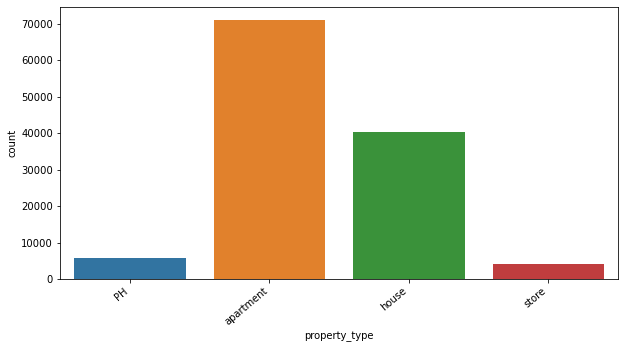

In [315]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "property_type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

Visualización de cantidades por tipo de provincia

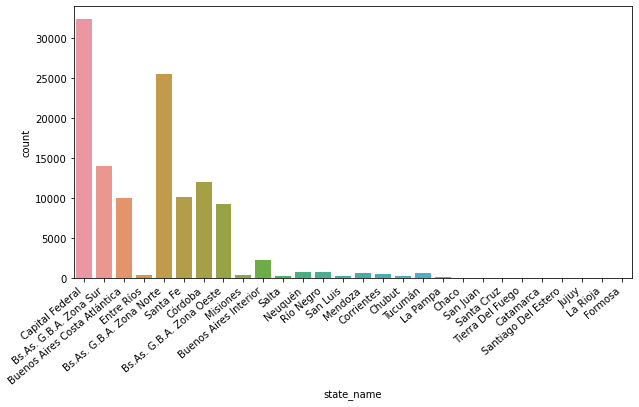

In [316]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "state_name")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

Visualización de cantidades por tipo de moneda

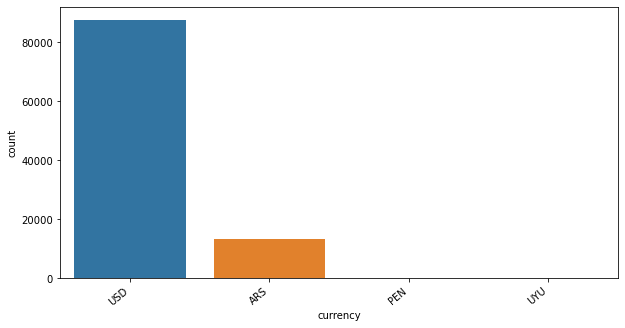

In [317]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "currency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

Visualización de precio promedio en dólares por metro cuadrado, agrupado por el tipo de propiedad

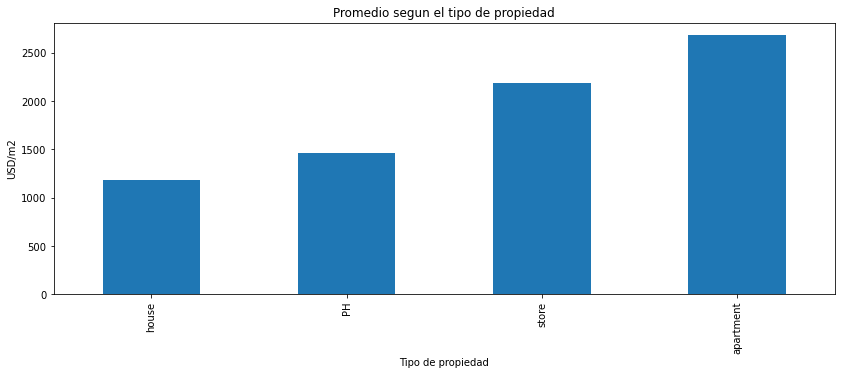

In [318]:
dataAgrupadaByPropertyType = data.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
graph = dataAgrupadaByPropertyType.plot.bar(figsize=(14,5))
graph.set_title("Promedio segun el tipo de propiedad")
graph.set_ylabel("USD/m2")
graph.set_xlabel("Tipo de propiedad")
plt.show()

Visualización de la relacion entre la cantidad de rooms y el precio por metro cuadrado en dólares

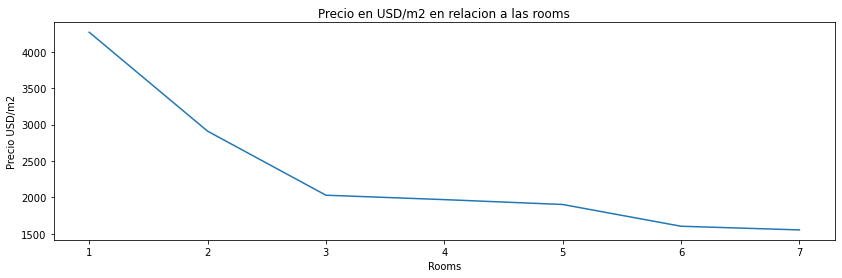

In [319]:
dataConPrecio_filtrada_Rooms = data.loc[data['rooms'] < 8,['rooms','price_usd_per_m2']]
dataConPrecio_filtrada_Rooms.groupby('rooms').mean()['price_usd_per_m2'].plot(figsize=(14,4))
plt.title('Precio en USD/m2 en relacion a las rooms');
plt.xlabel('Rooms');
plt.ylabel('Precio USD/m2');
plt.show();

Correlación entre los datos

<AxesSubplot:>

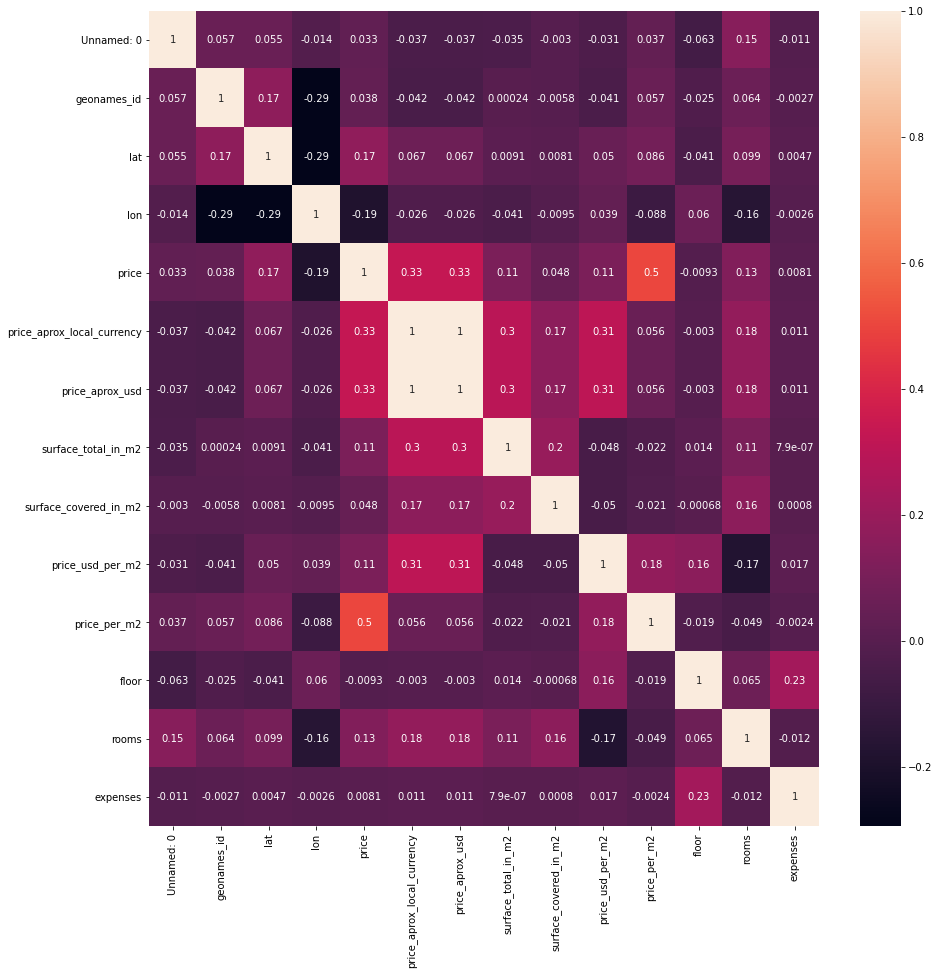

In [320]:
fig =plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

<a id="section_duplicados"></a> 
## **Duplicados**

---



Como criterio para eliminar los datos duplicados, buscamos información repetida en los campos 'description', 'title' y 'surface_total_in_m2'. Encontramos 15.385 publicaciones repetidas y nos quedamos sólo con la última publicación de cada una. Se eliminaron en total 10.583 filas, que serían aproximadamente el 9% de los datos totales.

In [321]:
mask_description_title_duplicated = data.duplicated(['description', 'title','surface_total_in_m2'],keep=False)
data2 = data[mask_description_title_duplicated].sort_values(['description','Unnamed: 0'])
with pd.option_context('display.max_colwidth',500):(display(data2[['description','properati_url']].head(4)))

description  \
112038  \tCECILIA INMUEBLES OFRECE:Impecable propiedades a estrenar, Increíble Vista a las Sierras , inmejorable entorno, rodeado de naturaleza , frente al Rio Las Mojarras (zona pesquera) a un km aprox de ruta 38 y a 15 de carlos paz y 8 de cosquin . Sup Cubierta: 190 m2 aproxSup terreno 600 aprx.–Casa Principal: 1 dormitorios amplio de 6 x 4, 1 baño 3 x 2,10, cocina comedor de 8x 4 con ventilador de techo. Sup Cubierta: 64 m2. Cochera para 2 autos. Asador de material. (Techo de madera con aislante...   
112042  \tCECILIA INMUEBLES OFRECE:Impecable propiedades a estrenar, Increíble Vista a las Sierras , inmejorable entorno, rodeado de naturaleza , frente al Rio Las Mojarras (zona pesquera) a un km aprox de ruta 38 y a 15 de carlos paz y 8 de cosquin . Sup Cubierta: 190 m2 aproxSup terreno 600 aprx.–Casa Principal: 1 dormitorios amplio de 6 x 4, 1 baño 3 x 2,10, cocina comedor de 8x 4 con ventilador de techo. Sup Cubierta: 64 m2. Cochera para 2 autos. Asador de material. (Techo de madera con aislante...   
108192                                                           No es apto crédito.Gavilán Plaza,  es un edificio de 9 pisos, 6 departamentos por piso, entrada a las cocheras, cabina para la seguridad, con control de ingreso de personas y autos. En el piso 10, se ubican los amenities (piscina, gimnasio, salón, solárium, parrillas y laundry). El departamento es un  2 ambientes,  ubicado al contrafrente, con un amplio balcón. Muy luminoso.  El baño es en suite completo y con bañera. Además,  tiene to...   
108206                                                           No es apto crédito.Gavilán Plaza,  es un edificio de 9 pisos, 6 departamentos por piso, entrada a las cocheras, cabina para la seguridad, con control de ingreso de personas y autos. En el piso 10, se ubican los amenities (piscina, gimnasio, salón, solárium, parrillas y laundry). El departamento es un  2 ambientes,  ubicado al contrafrente, con un amplio balcón. Muy luminoso.  El baño es en suite completo y con bañera. Además,  tiene to...   

                                                                                                                                                                                                          properati_url  
112038                                                                                    http://www.properati.com.ar/1c6h0_venta_casa_punilla_piscina_luminoso_garage_impecable_placard_estrenar_cecilia-inmuebles_gjw  
112042                                                                                    http://www.properati.com.ar/1c6h5_venta_casa_punilla_piscina_luminoso_garage_impecable_placard_estrenar_cecilia-inmuebles_gjw  
108192  http://www.properati.com.ar/1bzlj_venta_departamento_flores_gavilan_800_balcon_suite_gimnasio_lavadero_parrilla_piscina_toilette_luminoso_garage_amenities_apto-credito-hipotecario_alternativa-propiedades_gk9  
108206  http://www.properati.com.ar/1bzmk_venta_departamento_flores_gavilan_800_balcon_suite_gimnasio_lavadero_parrilla_piscina_toilette_luminoso_garage_amenities_apto-credito-hipotecario_alternativa-propiedades_gk9

In [322]:
data2.shape

(15385, 26)

In [323]:
dataNuevo = data.copy()
print('Las dimensiones antes de eliminar duplicados es',dataNuevo.shape)
dataNuevo.drop_duplicates(['description', 'title','surface_total_in_m2'],inplace=True,keep='last')
print('Las dimensiones despues de eliminar duplicados es',dataNuevo.shape)
Visualizacion = pd.DataFrame({'Original':data.isnull().mean()*100, 'Sin duplicados':dataNuevo.isnull().mean()*100})
Visualizacion

Las dimensiones antes de eliminar duplicados es (121220, 26)
Las dimensiones despues de eliminar duplicados es (110637, 26)


Original  Sin duplicados
Unnamed: 0                   0.000000        0.000000
operation                    0.000000        0.000000
property_type                0.000000        0.000000
place_name                   0.018974        0.020789
place_with_parent_names      0.000000        0.000000
country_name                 0.000000        0.000000
state_name                   0.000000        0.000000
geonames_id                 15.440521       15.876244
lat-lon                     42.525986       40.935673
lat                         42.525986       40.935673
lon                         42.525986       40.935673
price                       16.837156       15.353815
currency                    16.837981       15.354719
price_aprox_local_currency  16.837156       15.353815
price_aprox_usd             16.837156       15.353815
surface_total_in_m2         32.443491       33.647875
surface_covered_in_m2       16.422208       16.514367
price_usd_per_m2            43.394654       43.133852
price_per_m2                27.686850       26.561639
floor                       93.483749       93.553694
rooms                       60.905791       59.943780
expenses                    88.234615       87.730145
properati_url                0.000000        0.000000
description                  0.001650        0.001808
title                        0.000000        0.000000
image_thumbnail              2.567233        2.145756

Vemos que al eliminar los duplicados, el porcentaje de nulos **por campo** disminuye en la mayoría de los casos pero no de manera significativa.

<a id="section_eliminación_de_columnas"></a> 
## **Eliminación de columnas**

---



El data set tiene datos que no son útiles para este desafío y por ende las eliminamos. Las razones por las cuales decidimos eliminar cada columna fueron:

 - **Unnamed: 0:** Esta columna es exactamente igual que index de los datos por lo tanto es información redundante.
 - **operation:** Todas las operaciones son ventas por lo tanto no podemos sacar ninguna relación útil.
 - **country_name:** Todas las operaciones son ventas en Argentina por lo tanto no podemos sacar ninguna relación útil.
 - **lat-lon:** Nos quedaremos con las columnas que tienen los datos de lat y lon por separado.
 - **expenses:** Es un dato que no influye en la variable target *"precio/m2"*.
 - **properati_url:** Es un dato que no influye en la variable target *"precio/m2"*.
 - **image_thumbnail:** Es un dato que no influye en la variable target *"precio/m2"*.
 - **Floor:** Esta columna no llegamos a utilizarlas en este desafío.
 -  **Lat y Lon:** Estas columnas no llegamos a utilizarlas en este desafío.
 - **geonames_id:** Esta columna no llegamos a utilizarlas en este desafío.

In [324]:
dataNuevoDropColum = dataNuevo.drop(['Unnamed: 0','operation','country_name','lat-lon','expenses','properati_url','image_thumbnail',"floor","lat","lon","geonames_id"],axis=1)

In [325]:
dataNuevoDropColum.isnull().mean()*100

property_type                  0.000000
place_name                     0.020789
place_with_parent_names        0.000000
state_name                     0.000000
price                         15.353815
currency                      15.354719
price_aprox_local_currency    15.353815
price_aprox_usd               15.353815
surface_total_in_m2           33.647875
surface_covered_in_m2         16.514367
price_usd_per_m2              43.133852
price_per_m2                  26.561639
rooms                         59.943780
description                    0.001808
title                          0.000000
dtype: float64

<a id="section_place_name"></a> 
## **Análisis de las columnas "Place with parent name", "place_name" y "state_name"**

Será importante tener en cuenta la influencia espacial en los precios por metro cuadrado. En efecto, es probable que existan diferencias importantes en las diferentes geografías, barrios y zonas analizadas, por lo que es importante separar la información cargada en la columna "Place with parent name". Esta columna cuenta con un texto especificando la ubicación de forma ordenada utilizando "|" como separador.

Esta información la compararemos con las columnas "place_name" y "state_name" verificando si se trata de la misma información.

Comenzamos verificando qué filas contienen **NaN** en la columna "place_name". 

Verificamos primero cuáles son las filas con "place_name" igual a NaN. Las 23 filas con valores nulos en 'place_name' cuentan con información en la columna "place_with_parent_names" por lo que se puede completar.

Más adelante confirmaremos que los valores de "place_name" corresponden el nivel más alto de "place_with_parent_names" especificado.

In [326]:
mask_place_name_null = dataNuevoDropColum.place_name.isnull()
print('place_with_parent_names tiene',mask_place_name_null.sum(),'nulos')
dataNuevoDropColum.loc[mask_place_name_null,['place_name','place_with_parent_names']].head(3)

place_with_parent_names tiene 23 nulos


place_name                      place_with_parent_names
6489         NaN  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201        NaN  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451        NaN  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||

Armamos una serie que contiene cada valor de "place_with_parent_name" dividido en una lista con cada nivel especificado. Asignamos a los faltantes de "place_name" el nivel más alto de "place_with_parent_name".

In [327]:
#Asigno a todos los campos que faltaban el place_name 
missing_place_names = dataNuevoDropColum[mask_place_name_null].place_with_parent_names.apply(lambda x: list(filter(None, x.split('|')))[-1])
dataNuevoDropColum.loc[mask_place_name_null,'place_name'] = missing_place_names
print('place_name ahora tiene',dataNuevoDropColum.place_with_parent_names.isnull().sum(),'nulos')

place_name ahora tiene 0 nulos


Imprimimos un fragmentos de los datos en el que "place_with_parent_name" cuenta con 5 niveles. Tanto de la serie que generamos previamente, como de la columna "place_name" y por último contamos el número de niveles utilizado en "place_with_parent_name" siendo 3 y 4 niveles los más frecuentes.

In [328]:
with pd.option_context('display.max_colwidth',500):
    place_with_parent_names_list = dataNuevoDropColum.place_with_parent_names.apply(lambda x: list(filter(None, x.split('|')))) #armo una lista con los place_with_parent__name
    mask_name_list = place_with_parent_names_list.apply(lambda a : len(a)) == 5 #mascara con los que tienen 5 divisiones
    print('Algunos place_with_parent_names de cinco niveles son:\n')
    display(place_with_parent_names_list[mask_name_list].head(3))
    print('\nSus respectivos place_name son:\n')
    display(dataNuevoDropColum.loc[mask_name_list,['place_with_parent_names','place_name']].head(3))
    print('\nLa cantidad de propiedades publicada con los distintos niveles de place_with_parent_name son:\n')
    print(place_with_parent_names_list.apply(lambda x: len(x)).value_counts())
    
    
#Algunas filas tienen 5 niveles en place_..._parent, son todos de Nordelta en donde seguramente el barrio sea importante.

Algunos place_with_parent_names de cinco niveles son:



17           [Argentina, Bs.As. G.B.A. Zona Norte, Tigre, Nordelta, Barrio El Golf]
33           [Argentina, Bs.As. G.B.A. Zona Norte, Tigre, Nordelta, Barrio El Golf]
278    [Argentina, Bs.As. G.B.A. Zona Norte, Tigre, Nordelta, Barrio Las Glorietas]
Name: place_with_parent_names, dtype: object


Sus respectivos place_name son:



place_with_parent_names  \
17         |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio El Golf|   
33         |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio El Golf|   
278  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio Las Glorietas|   

               place_name  
17         Barrio El Golf  
33         Barrio El Golf  
278  Barrio Las Glorietas


La cantidad de propiedades publicada con los distintos niveles de place_with_parent_name son:

3    68640
4    37436
2     4047
5      514
Name: place_with_parent_names, dtype: int64


Para mayor practicidad y poder incorporarlo al dataframe de trabajo volcamos la serie de "place_with_parent_name" disgragado en un nuevo dataframe. Luego hacemos un join con ambos dataframes.

Titulados los distintos niveles "parent_lvl_#" y también generamos una columna "place_highest_specified" que compararemos con "place_name"

Ya que "parent_lvl_0" sólo cuenta con el valor "Argentina", eliminamos la columna.

In [329]:
#df_place_parent_name
place_with_parent_names_list = dataNuevoDropColum.place_with_parent_names.apply(lambda x: list(filter(None, x.split('|'))))#lista con parent name en lista
columns_names = [f'parent_lvl_{x}' for x in range(5)]  #['parent_lvl_0','parent_lvl_1','parent_lvl_2','parent_lvl_3','parent_lvl_4']
df_place_parent_name = pd.DataFrame(list(place_with_parent_names_list), index=place_with_parent_names_list.index, columns=columns_names) #lo llevo a formato DataFrame(list(place_with_parent_names_list), index=place_with_parent_names_list.index ,columns=columns_names)
print('Las propiedades por pais son:\n',df_place_parent_name.parent_lvl_0.value_counts(),'\nal ser todas de Argentina eliminamos la columna')
df_place_parent_name['place_highest_specified'] = place_with_parent_names_list.apply(lambda x: x[-1]) #Armo una columna con el nivel mas alto especificado
df_place_parent_name.drop(columns='parent_lvl_0',inplace=True) #saco la columna de pais
#df_place_parent_name.loc[47:59]

#https://es.wikipedia.org/wiki/Organizaci%C3%B3n_territorial_de_Argentina

Las propiedades por pais son:
 Argentina    110637
Name: parent_lvl_0, dtype: int64 
al ser todas de Argentina eliminamos la columna


In [330]:
if not 'parent_lvl_1' in dataNuevoDropColum.columns:
  dataNuevoDropColum = dataNuevoDropColum.join(df_place_parent_name)
dataNuevoDropColum.head(1)

property_type place_name                place_with_parent_names  \
0            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   

        state_name    price currency  price_aprox_local_currency  \
0  Capital Federal  62000.0      USD                   1093959.0   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0          62000.0                 55.0                   40.0   

   price_usd_per_m2  price_per_m2  rooms  \
0       1127.272727        1550.0    NaN   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   

                                title     parent_lvl_1 parent_lvl_2  \
0  2 AMB TIPO CASA SIN EXPENSAS EN PB  Capital Federal    Mataderos   

  parent_lvl_3 parent_lvl_4 place_highest_specified  
0         None         None               Mataderos

Comparamos "place_highest_specified" con "place_name", al ser iguales eliminamos "place_highest_specified".

In [331]:
#Verifico que place_name sea igual que place_highest_specified
print('Place name igual al último especificado en place with parent name:')
print((dataNuevoDropColum['place_name'] == dataNuevoDropColum['place_highest_specified']).all())
# es cierto para todos los campos por lo que puedo dropear place_highest_specified y place_name
dataNuevoDropColum.drop(columns=['place_highest_specified'],inplace=True) #,'place_name'
dataNuevoDropColum.head(1)

Place name igual al último especificado en place with parent name:
True


property_type place_name                place_with_parent_names  \
0            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   

        state_name    price currency  price_aprox_local_currency  \
0  Capital Federal  62000.0      USD                   1093959.0   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0          62000.0                 55.0                   40.0   

   price_usd_per_m2  price_per_m2  rooms  \
0       1127.272727        1550.0    NaN   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   

                                title     parent_lvl_1 parent_lvl_2  \
0  2 AMB TIPO CASA SIN EXPENSAS EN PB  Capital Federal    Mataderos   

  parent_lvl_3 parent_lvl_4  
0         None         None

Comparamos "parent_lvl_1" con "state_name", al ser iguales eliminamos "state_name".

In [332]:
#Verifico que state_name sea igual que parent_lvl_1
print('State_name igual al último especificado en place with parent name:')
print((dataNuevoDropColum['state_name'] == dataNuevoDropColum['parent_lvl_1']).all())
dataNuevoDropColum.drop(columns='state_name',inplace=True)
dataNuevoDropColum.head(1)

State_name igual al último especificado en place with parent name:
True


property_type place_name                place_with_parent_names    price  \
0            PH  Mataderos  |Argentina|Capital Federal|Mataderos|  62000.0   

  currency  price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0      USD                   1093959.0          62000.0                 55.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  rooms  \
0                   40.0       1127.272727        1550.0    NaN   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   

                                title     parent_lvl_1 parent_lvl_2  \
0  2 AMB TIPO CASA SIN EXPENSAS EN PB  Capital Federal    Mataderos   

  parent_lvl_3 parent_lvl_4  
0         None         None

In [333]:
dataNuevoDropColum.drop(columns=['place_with_parent_names'],inplace=True)

In [334]:
dataNuevoDropColum.loc[:,'parent_lvl_1':'parent_lvl_4'] = dataNuevoDropColum.loc[:,'parent_lvl_1':'parent_lvl_4'].fillna('Sin especificar')

In [335]:
dataNuevoDropColum.head(1)

property_type place_name    price currency  price_aprox_local_currency  \
0            PH  Mataderos  62000.0      USD                   1093959.0   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0          62000.0                 55.0                   40.0   

   price_usd_per_m2  price_per_m2  rooms  \
0       1127.272727        1550.0    NaN   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   

                                title     parent_lvl_1 parent_lvl_2  \
0  2 AMB TIPO CASA SIN EXPENSAS EN PB  Capital Federal    Mataderos   

      parent_lvl_3     parent_lvl_4  
0  Sin especificar  Sin especificar

<a id="section_duplicados_description"></a> 
## **Eliminación de duplicados por similitud de "description"**

Realizamos un análisis más detallado de la existencia de propiedades duplicadas en el dataframe. Con énfasis en los campos de superficie, los cuales no deberían variar cuando una misma propiedad se publica repetidas veces.

In [336]:
dataNuevoDropColum.isnull().mean()*100

property_type                  0.000000
place_name                     0.000000
price                         15.353815
currency                      15.354719
price_aprox_local_currency    15.353815
price_aprox_usd               15.353815
surface_total_in_m2           33.647875
surface_covered_in_m2         16.514367
price_usd_per_m2              43.133852
price_per_m2                  26.561639
rooms                         59.943780
description                    0.001808
title                          0.000000
parent_lvl_1                   0.000000
parent_lvl_2                   0.000000
parent_lvl_3                   0.000000
parent_lvl_4                   0.000000
dtype: float64

Comparando los datos ordenando el dataframe por "description" y "surface_total_in_m2" se ven varios casos de propiedades repetidas. Una misma propiedad suele propiedad cargada más de una vez cambiando el barrio por barrios aledaños, existen propiedades cargadas de forma repetida con distintos tipos de "property_type" y también existen propiedades de un mismo complejo que representan propiedades distintas. El desafío está en que muchas de estas propiedades pueden ser eliminadas como falsos duplicados.

In [337]:
with pd.option_context('display.max_colwidth',500):
  display(dataNuevoDropColum.loc[dataNuevoDropColum.duplicated(subset=['description','surface_total_in_m2'],keep=False),['description','title','parent_lvl_2']].sort_values('description').head(2)) #,'title'

description  \
109024                                                           No es apto crédito.Gavilán Plaza,  es un edificio de 9 pisos, 6 departamentos por piso, entrada a las cocheras, cabina para la seguridad, con control de ingreso de personas y autos. En el piso 10, se ubican los amenities (piscina, gimnasio, salón, solárium, parrillas y laundry). El departamento es un  2 ambientes,  ubicado al frente, con un amplio balcón. Muy luminoso.  El baño es en suite completo y con bañera. Además,  tiene toilette...   
108207                                                           No es apto crédito.Gavilán Plaza,  es un edificio de 9 pisos, 6 departamentos por piso, entrada a las cocheras, cabina para la seguridad, con control de ingreso de personas y autos. En el piso 10, se ubican los amenities (piscina, gimnasio, salón, solárium, parrillas y laundry). El departamento es un  2 ambientes,  ubicado al frente, con un amplio balcón. Muy luminoso.  El baño es en suite completo y con bañera. Además,  tiene toilette...   

                            title parent_lvl_2  
109024      Departamento - Flores       Flores  
108207  Departamento - Flores Sur       Flores

Ordenando el dataframe por "surface_total_in_m2", "parent_lvl_1" y "price" comparamos la descripción de cada fila con las siguientes 5 filas. La comparación la hacemos con la función "SequenceMatcher" de la librería "difflib" y obtenemos un valor float de 0 a 1 según el nivel de coincidencia. Marcamos las filas que cuentan con una coincidencia mayor a 0.5 para luego filtar los repetidos.

In [338]:
from difflib import SequenceMatcher

def similar(a,b):
    return SequenceMatcher(None,a,b)


ADVERTENCIA: la siguiente celda puede demorar 15 minutos en ejecutar.

In [339]:
# Esta celda puede tardar 15 min.

df_prueba = dataNuevoDropColum.sort_values(['surface_covered_in_m2','parent_lvl_1','price'],ascending=[False,False,False])
indices = list(df_prueba.index) #Armo una lista de los indices
print('Se evaluan',len(indices),'filas.')
df_prueba.loc[:,['aux1','aux2']] = False

for i in range(len(indices)-1):
  if df_prueba.loc[indices[i],'aux1'] == True: #me evita evaluar los que ya dieron repetido con una fila anterior
    continue
  for j in range(i+1, len(indices) if i+5 > len(indices) else i+5):
    a = df_prueba.loc[indices[i],'description']
    b = df_prueba.loc[indices[j],'description']
    try:
      if similar(a,b).ratio() > 0.5:
        df_prueba.loc[indices[j],'aux1'] = True
        df_prueba.loc[indices[i],'aux2'] = True
    except:
      pass

print('Se encontraron',df_prueba.aux1.sum(),'duplicados.')

#print("Los duplicados de ['surface_total_in_m2','parent_lvl_1'] son de shape:",df_prueba.shape)
#with pd.option_context('display.max_colwidth',5000):

#  display(df_prueba.head(30))
  

Se evaluan 110637 filas.
Se encontraron 12545 duplicados.


Visualizamos algunos repetidos.

In [340]:
with pd.option_context('display.max_colwidth',500):
  display(df_prueba.loc[(df_prueba.aux1 == True) | (df_prueba.aux2 == True),['description','parent_lvl_1','aux1','aux2']].head(60))

description  \
17204                                                                                                                  LIBERTADOR SERVICIOS INMOBILIARIOS VENDE HERMOSA ESQUINA EN EL CENTRO DE MONTE VERA, CON 2 DORMITORIOS, LIVING-COMEDOR, COMEDOR, BAÑO, COCHERA, QUINCHO. GRAN PATIO..... EXCELENTE ESTADO!!!!!!!! Lorena Curcho Corredor Inmobiliario Matrícula 0191. Santa Fe. ArgentinaVentas en Argentina, Uruguay, Panamá y Miami. Contacto desde Argentina: 0810 888 7475 / Resto del mundo: +54 9 342 4452679.   
10824                                                                                                                                                                                                   2 dormitorios, cocina sectorizada, comedor, cochera, patio seco y con cesped, lavadero cubierto, baño de servicioLorena Curcho Corredor Inmobiliario Matrícula 0191. Santa Fe. ArgentinaVentas en Argentina, Uruguay, Panamá y Miami. Contacto desde Argentina: 0810 888 7475 / Resto del mundo: +54 9 342 4452679.   
27216   Corredor Responsable: Real Estate New Generation S.A. - C.C.P.I.M 0001- S.A.- 2011Contacto: Celeste Rosso - MLS ID # 420831003-13Departamento muy bien ubicado, a 1 cuadra de la Municipalidad de Guaymallén.  Desarrollado en planta baja, en un complejo cerrado de 4 departamentos, todos con cochera. Se ingresa por un espacioso living-comedor con un ventanal que da al patio interno y que se encuentra en el mismo ambiente que la cocina. A través de un pasillo de distribución se accede a los 2 dor...   
27214   Corredor Responsable: Real Estate New Generation S.A. - C.C.P.I.M 0001- S.A.- 2011Contacto: Celeste Rosso - MLS ID # 420831003-15Departamento muy bien ubicado, a 1 cuadra de la Municipalidad de Guaymallén.  Desarrollado en planta baja, en un complejo cerrado de 4 departamentos, todos con cochera. Se ingresa por un espacioso living-comedor que se encuentra en el mismo ambiente que la cocina. A través de un pasillo de distribución se accede al dormitorio (con placard) y al baño. Dispone de un ...   
27217   Corredor Responsable: Real Estate New Generation S.A. - C.C.P.I.M 0001- S.A.- 2011Contacto: Celeste Rosso - MLS ID # 420831003-16Departamento muy bien ubicado, a 1 cuadra de la Municipalidad de Guaymallén.  Desarrollado en planta baja, en un complejo cerrado de 4 departamentos, todos con cochera. Se ingresa por un espacioso living-comedor que se encuentra en el mismo ambiente que la cocina. A través de un pasillo de distribución se accede al dormitorio (con placard) y al baño. También cuenta...   
64847   Partido de San Martín - VILLA BALLESTER - CÓDIGO 0204 LVEDIFICIO DE 6500  m2, Con RENTA ,  Alquilado x 36 meses, sobre Fracción de terreno de 4.500m2, sobre la cual se halla construido un complejo DEPORTIVO: locales comerciales, confitería, piscina semiolímpica, piscinas comunitarias, canchas de futbol, paddle, tenis, cancha multideportes y gimnasio. Zona residencial. Zonificación Ru. FOS 0.6 FOT 0.8. Apto para continuar la explotación o reconvertir a complejo habitacional o supermercado, en...   
66226        Partido de San Martín - VILLA BALLESTER - CÓDIGO 0204 IVEDIFICIO DE 6.500  m2, CON RENTA  sobre Fracción de terreno de 4.500m2, sobre la cual se halla construido un complejo DEPORTIVO: locales comerciales, confitería, piscina semiolímpica, piscinas comunitarias, canchas de futbol, paddle, tenis, cancha multideportes y gimnasio. Zona residencial. Zonificación Ru. FOS 0.6 FOT 0.8. Apto para continuar la explotación o reconvertir a complejo habitacional o supermercado, entre otras actividades   
67144          Partido de San Martín - VILLA BALLESTER - CÓDIGO 0204 LVEDIFICIO DE 6500 m2,  CON RENTA sobre Fracción de terreno de 4.500m2, sobre la cual se halla construido un complejo DEPORTIVO: locales comerciales, confitería, piscina semiolímpica, piscinas comunitarias, canchas de futbol, paddle, tenis, cancha multideportes y gimnasio. Zona residencial. Zonificación Ru. FOS 0.6 FOT 0.8. Apto para con

Se eliminan las filas repetidas(valor en columna aux1 == True en el dataframe auxiliar)

In [341]:
data_display = dataNuevoDropColum.copy()
indices_de_repetidos = df_prueba.loc[df_prueba.aux1 == True].index
dataNuevoDropColum.drop(labels=indices_de_repetidos, axis=0,inplace=True)
#Ejecutar solo una vez

In [342]:
print('Se eliminaron',data_display.shape[0]-dataNuevoDropColum.shape[0],'filas, de',data_display.shape[0],'filas originales. Obteniendo',dataNuevoDropColum.shape[0],'filas.')
Visualizacion = pd.DataFrame({'Antes':data_display.isnull().mean()*100, 'Despues':dataNuevoDropColum.isnull().mean()*100})
Visualizacion

Se eliminaron 12545 filas, de 110637 filas originales. Obteniendo 98092 filas.


Antes    Despues
property_type                0.000000   0.000000
place_name                   0.000000   0.000000
price                       15.353815  14.644415
currency                    15.354719  14.644415
price_aprox_local_currency  15.353815  14.644415
price_aprox_usd             15.353815  14.644415
surface_total_in_m2         33.647875  34.268850
surface_covered_in_m2       16.514367  16.492680
price_usd_per_m2            43.133852  43.076907
price_per_m2                26.561639  26.199894
rooms                       59.943780  59.309628
description                  0.001808   0.002039
title                        0.000000   0.000000
parent_lvl_1                 0.000000   0.000000
parent_lvl_2                 0.000000   0.000000
parent_lvl_3                 0.000000   0.000000
parent_lvl_4                 0.000000   0.000000

In [343]:
dataNuevoDropColum.to_csv('properatti_sin_duplicados.csv')

In [344]:
dataNuevoDropColum = pd.read_csv('properatti_sin_duplicados.csv',index_col=0)

<a id="section_regex"></a> 
## **Extracción de información utilizando regex**

En primer lugar se transformó la descripción como el título a minúscula, para que las regex puedan ser aplicadas inditintamente si se encontraba en mayúscula o minúscula.

In [345]:
dataNuevoDropColum['description_minus']=dataNuevoDropColum['description'].apply(lambda x: str(x).lower())
dataNuevoDropColum['title_minus']=dataNuevoDropColum['title'].apply(lambda x: str(x).lower())

Creación de la función `Diccionario` que nos permitirá mapear los patrones encontrados por las regex y sutituir por su valor numñerico correspondiente.

In [346]:
def Diccionario(x):
  numeroStr = x.group("cantidad")
  dictAmbientes = {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'mono':1,'un':1, 'uno':1, 'dos':2, 'tres':3,'cuatro':4, 'cinco':5, 'seis':6, 'siete':7, 'ocho':8, 'nueve':9, 'diez':10}
  resultado = dictAmbientes[numeroStr]
  return resultado

Creación de la función `RegexReplace` la cual recibe como argumentos:


1.   `pattern`: expresión regular que implementará la regex para realizar la búsqueda. 
2.   `data`: DataFrame que será el origen de todos los datos.
3.   `column`: Campo a crear luego de aplicar la regex. Si el campo ya existe solo agrega datos en el, caso contrario lo crea con todos sus datos en `0`
4.   `source`: Columna de origen para aplicar la regex sobre `data`
5.   `Func`: Función de agrupación a implementar para la sutitución.


In [347]:
def RegexReplace(pattern, data, column, source, Func, graph=True):
  if not(column in data.columns):
    data[column] = 0.0
  sumaEncontrado = 0
  sumaReemplazado = 0
  for sour in source:
    matchSource = data[sour].apply(lambda x: x if x is np.NaN else pattern.search(x)) #Realiza el search en la columna especificada y lo guarda en una serie
    maskColumn_NullAndMatch = (data[column] ==0.0) & (matchSource.notnull()) #Hace una mascara para las filas con un match y que la columna no tenga un valor previo.
    data.loc[maskColumn_NullAndMatch,column] = matchSource[maskColumn_NullAndMatch].apply(Func) #Vuelca la data en el DataFrame
    sumaEncontrado += matchSource.notnull().sum()
    sumaReemplazado += maskColumn_NullAndMatch.sum()
  print(f'Analisis en {column}:\nFilas analizadas: {data.shape[0]} \nFilas encontradas: {sumaEncontrado}\nFilas modificadas: {sumaReemplazado}\n')
  if graph == True:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data = data, x = column)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
    plt.show()



In [348]:
def RegexReplaceAmenity(pattern, data, column, source, Func):
  if not(column in data.columns):
    data[column] = 0.0
  sumaEncontrado = 0
  sumaReemplazado = 0
  for sour in source:
    matchSource = data[sour].apply(lambda x: x if x is np.NaN else pattern.search(x)) #Realiza el search en la columna especificada y lo guarda en una serie
    maskColumn_NullAndMatch = (data[column] == 0.0) & (matchSource.notnull()) #Hace una mascara para las filas con un match y que la columna no tenga un valor previo.
    data.loc[maskColumn_NullAndMatch,column] = matchSource[maskColumn_NullAndMatch].apply(Func) #Vuelca la data en el DataFrame
    sumaEncontrado += matchSource.notnull().sum()
    sumaReemplazado += maskColumn_NullAndMatch.sum()
  print(f'Analisis en {column}:\nFilas analizadas: {data.shape[0]} \nFilas encontradas: {sumaEncontrado}\nFilas modificadas: {sumaReemplazado}\n')
  dato   = (sum(data[column]==0),sum(data[column]!=0)) # serie de numeros
  groups = ['No', 'Si']
  fig = plt.figure(figsize=(5,3)); ax = plt.axes()
  ax.pie(dato, labels = groups ,autopct='%1.1f%%')
  plt.title('Propiedades con '+column)

### Ambientes

Búsqueda de patrones en la descripción y en el título buscando una cantidad tanto numérica como textual para los ambientes

Analisis en rooms:
Filas analizadas: 98092 
Filas encontradas: 62327
Filas modificadas: 0



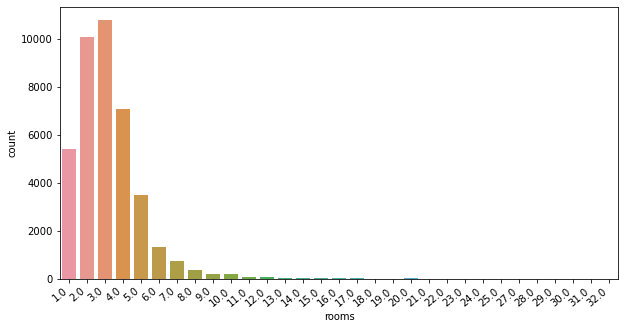

In [349]:
regex = re.compile('(?P<cantidad>1|2|3|4|5|6|7|un|mono|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s?(amb)')
RegexReplace(regex,dataNuevoDropColum,'rooms',['description_minus','title_minus'],Diccionario)

### Balcón

Búsqueda de patrones en la descripción y en el título buscando balcones

Analisis en balcon:
Filas analizadas: 98092 
Filas encontradas: 36869
Filas modificadas: 34260



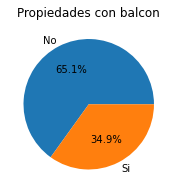

In [350]:
regex= re.compile('(?P<balcon>balc|balcón)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'balcon',['description_minus','title_minus'],lambda x: 1)

### Gimnasio

Búsqueda de patrones en la descripción y en el título buscando  gimnasios

Analisis en gimnasio:
Filas analizadas: 98092 
Filas encontradas: 7000
Filas modificadas: 6970



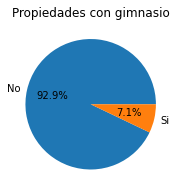

In [351]:
regex= re.compile('(?P<gimnasio>gimnasio|gym|gim)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'gimnasio',['description_minus','title_minus'],lambda x: 1)

### Pileta

Búsqueda de patrones en la descripción y en el título buscando  piletas

Analisis en pileta:
Filas analizadas: 98092 
Filas encontradas: 27792
Filas modificadas: 26435



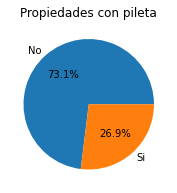

In [352]:
regex= re.compile('(?P<pileta>pile|piscina|picina|pisina)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'pileta',['description_minus','title_minus'],lambda x: 1)

### Asador/Quincho

Búsqueda de patrones en la descripción y en el título buscando  quinchos, asadores, parrillas, salones, etc

Analisis en asador:
Filas analizadas: 98092 
Filas encontradas: 41197
Filas modificadas: 40081



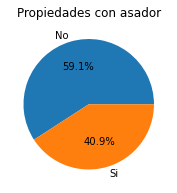

In [353]:
regex= re.compile('(?P<quincho>quincho|asador|parrilla|sum|salon de usos multiples)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'asador',['description_minus','title_minus'],lambda x: 1)

### Cochera

Búsqueda de patrones en la descripción y en el título buscando  cochera

Analisis en cochera:
Filas analizadas: 98092 
Filas encontradas: 49839
Filas modificadas: 44633



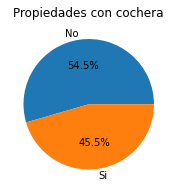

In [354]:
regex= re.compile('(?P<cochera>cochera|estacionamiento|garage|garaje)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'cochera',['description_minus','title_minus'],lambda x: 1)

### Lavanderia

Búsqueda de patrones en la descripción y en el título buscando  Lavanderia

Analisis en lavanderia:
Filas analizadas: 98092 
Filas encontradas: 4995
Filas modificadas: 4982



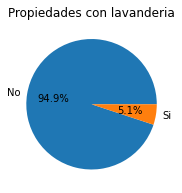

In [355]:
regex= re.compile('(?P<laundry>laundry|lavanderia|loundry|landry)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'lavanderia',['description_minus','title_minus'],lambda x: 1)

### Lavadero

Búsqueda de patrones en la descripción y en el título buscando  lavadero

Analisis en lavadero:
Filas analizadas: 98092 
Filas encontradas: 33805
Filas modificadas: 33661



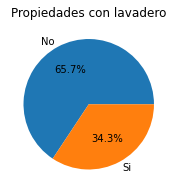

In [356]:
regex= re.compile('(?P<lavadero>lavadero)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'lavadero',['description_minus','title_minus'],lambda x: 1)

### Apto_Prof 
Búsqueda de patrones en la descripción y en el título buscando apto para profesional

Analisis en apto_prof:
Filas analizadas: 98092 
Filas encontradas: 4359
Filas modificadas: 3911



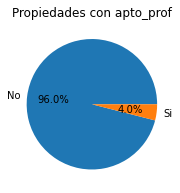

In [357]:
regex= re.compile('(?P<apto_prof>apto profesional|apto prof\.)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'apto_prof',['description_minus','title_minus'],lambda x: 1)

### Baulera 
Búsqueda de patrones en la descripción y en el título buscando baulera o depósito

Analisis en baulera:
Filas analizadas: 98092 
Filas encontradas: 10488
Filas modificadas: 10049



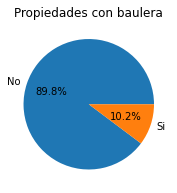

In [358]:
regex= re.compile('(?P<baulera>baulera|deposito)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'baulera',['description_minus','title_minus'],lambda x: 1)

### Calefacción 
Búsqueda de patrones en la descripción y en el título buscando calefacción, losa radiante, etc

Analisis en calefaccion:
Filas analizadas: 98092 
Filas encontradas: 8600
Filas modificadas: 8595



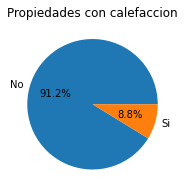

In [359]:
regex= re.compile('(?P<calefaccion>calefaccion|losa radiante|radiante)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'calefaccion',['description_minus','title_minus'],lambda x: 1)

### Solarium
Búsqueda de patrones en la descripción y en el título buscando solarium

Analisis en solarium:
Filas analizadas: 98092 
Filas encontradas: 6711
Filas modificadas: 6691



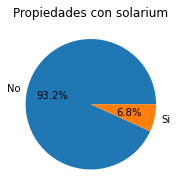

In [360]:
regex= re.compile('(?P<solarium>solarium)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'solarium',['description_minus','title_minus'],lambda x: 1)

### Seguridad 
Búsqueda de patrones en la descripción y en el título buscando seguridad, vigilancia.

Analisis en seguridad:
Filas analizadas: 98092 
Filas encontradas: 10363
Filas modificadas: 10253



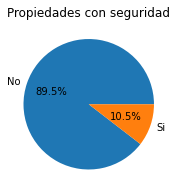

In [361]:
regex= re.compile('(?P<seguridad>seguridad|vigilancia)')
RegexReplaceAmenity(regex,dataNuevoDropColum,'seguridad',['description_minus','title_minus'],lambda x: 1)

### Funcion para graficar

In [362]:
def grafico_eliminar_outliers(data_graf ,campo_graf,limite_y = None, fin_titulo = ''):
    g = sns.catplot(x = "parent_lvl_1", y = campo_graf, hue="property_type", data=data_graf, kind="box", height=15, aspect=3, legend=False)
    g.set_axis_labels("Provincias/Territorios", campo_graf)
    limite_y_inicial = plt.ylim()
    if not(limite_y is None): #Se ejecuta cuando se introduce limite_y
        g.set(ylim=(0,limite_y))
    g.set_xticklabels(rotation=30,fontsize=20,ha='right')
    plt.yticks(fontsize=20)
    g.set_xlabels(fontsize=30)
    g.set_ylabels(fontsize=30)
    g.fig.suptitle( f'Boxplots de {campo_graf} por tipo de propiedad y provincia/territorio {fin_titulo}'  ,fontsize=35)
    plt.legend(fontsize=20)
    return limite_y_inicial[1]

### Surface Regex

Búsqueda de patrones en la descripción y en el título buscando metros, m2, mt2 o algo que referencie a la superficie.

In [363]:
regex= re.compile('(?P<mts2>\d\d?\d?\d?\d?)\s?(?P<metros>mt2|m2|mts2)')#mts|metros|
RegexReplace(regex,dataNuevoDropColum,'surfaceNuevo',['description_minus','title_minus'],lambda x: float(x.group("mts2")),graph=False)

Analisis en surfaceNuevo:
Filas analizadas: 98092 
Filas encontradas: 26669
Filas modificadas: 25331



Los datos obtenidos, juzgando por su rango, parecen representar mejor la superficie total de las propiedades.

50400.0

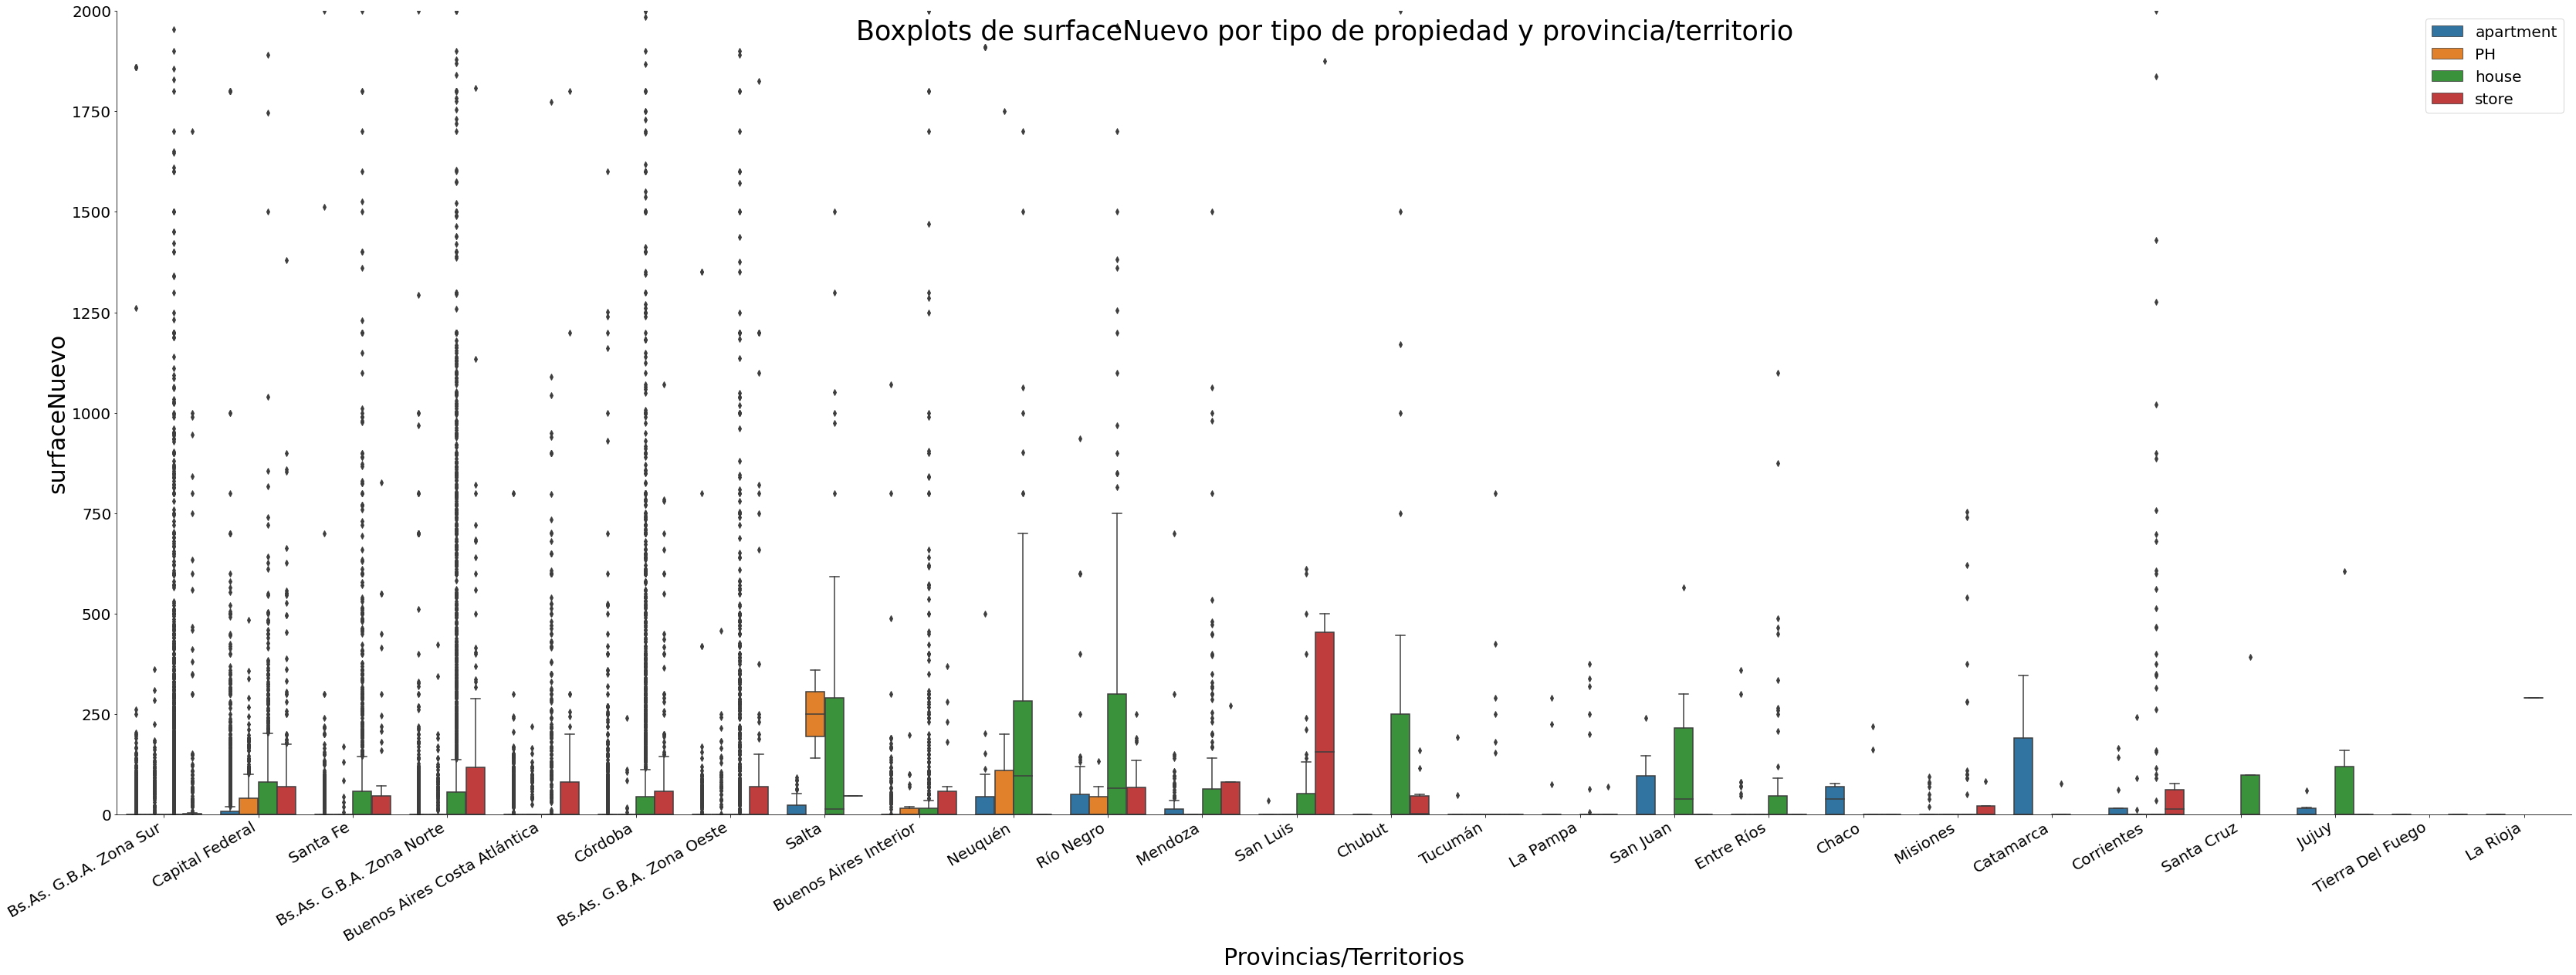

In [364]:
mask = dataNuevoDropColum['surface_total_in_m2'].isnull()&dataNuevoDropColum['surfaceNuevo'].notnull()
grafico_eliminar_outliers(dataNuevoDropColum.loc[mask],'surfaceNuevo',limite_y=2000)

#### Imputación de `surfaceNuevo` en `surface_total_in_m2` campo original del DF

Buscamos los núlos en `surface_total_in_m2` creando una máscara

In [365]:
mask=dataNuevoDropColum['surface_total_in_m2'].isnull()&dataNuevoDropColum['surface_covered_in_m2'].notnull()
mask.sum()

23088

Antes de sustituir por los nuevos, se imputan los campos de `surface_covered_in_m2` que no están en `surface_total_in_m2`

In [366]:
dataNuevoDropColum.loc[mask,'surface_total_in_m2']=dataNuevoDropColum.loc[mask,'surface_covered_in_m2']

Nuevamente se buscan los núlos en `surface_total_in_m2`

In [367]:
mask=dataNuevoDropColum['surface_total_in_m2'].isnull()&dataNuevoDropColum['surfaceNuevo'].notnull()
mask.sum()

10527

Se imputan el campo `surfaceNuevo` en `surface_total_in_m2`

In [368]:
dataNuevoDropColum.loc[mask,'surface_total_in_m2']=dataNuevoDropColum.loc[mask,'surfaceNuevo']

In [369]:
dataNuevoDropColum.drop(columns=['surfaceNuevo'],inplace=True)

### Price Regex

Análisis de la columna `price`

Realizamos mascaras en donde verificamos si hay conincidencia de nulos por fila de las columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd'

Se ve que en las filas que 'price' es nulo el resto tambien lo es y viceversa.

In [370]:
mask = dataNuevoDropColum['price'].isnull()
dataNuevoDropColum.loc[mask,['currency','price_aprox_local_currency', 'price_aprox_usd']].notnull().sum()

currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
dtype: int64

In [371]:
mask = dataNuevoDropColum['price'].notnull()
dataNuevoDropColum.loc[mask,['currency','price_aprox_local_currency', 'price_aprox_usd']].isnull().sum()

currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
dtype: int64

PRECIOS 
Utilizando la linea de abajo donde se hace un muestreo de las lineas en los que los precios son nulos se observa que el simbolo "$" se utiliza para aclarar comisiones o costos administrativos de las inmobiliarias. Tambien se observa que hay muy pocos datos de precios de ventas en las descripciones. 
Por estos motivos decidimos realizar la busqueda con un Regex de la palabra dolares y de los simbolos relacionados a esta moneda.

Creación de la función `monto` que elimina comas y puntos para transformar el valor en un float

In [372]:
def monto(x):
  montoStr = x.group('precio')
  resultado = montoStr.replace(',','').replace('.','')
  resultado = int(resultado)
  return resultado

Búsqueda de patrones en la descripción y en el título buscando una cantidad para precios en doláres.

In [373]:
regex= re.compile('(?P<precio>\d+[\.|,]?\d*)\s?(?P<dolardespues>u\$d|us\$|u\$s|usd|dolares|dollar|dollares)')
RegexReplace(regex,dataNuevoDropColum,'PrecioNuevo',['description_minus','title_minus'],monto,graph=False)

Analisis en PrecioNuevo:
Filas analizadas: 98092 
Filas encontradas: 447
Filas modificadas: 447



In [374]:
regex= re.compile('(?P<dolarantes>u\$d|us\$|u\$s|usd|dolares|dollar|dollares)\s?(?P<precio>\d+[\.|,]?\d*)')
RegexReplace(regex,dataNuevoDropColum,'PrecioNuevo',['description_minus','title_minus'],monto,graph=False)

Analisis en PrecioNuevo:
Filas analizadas: 98092 
Filas encontradas: 16172
Filas modificadas: 15274



2625003586692975.0

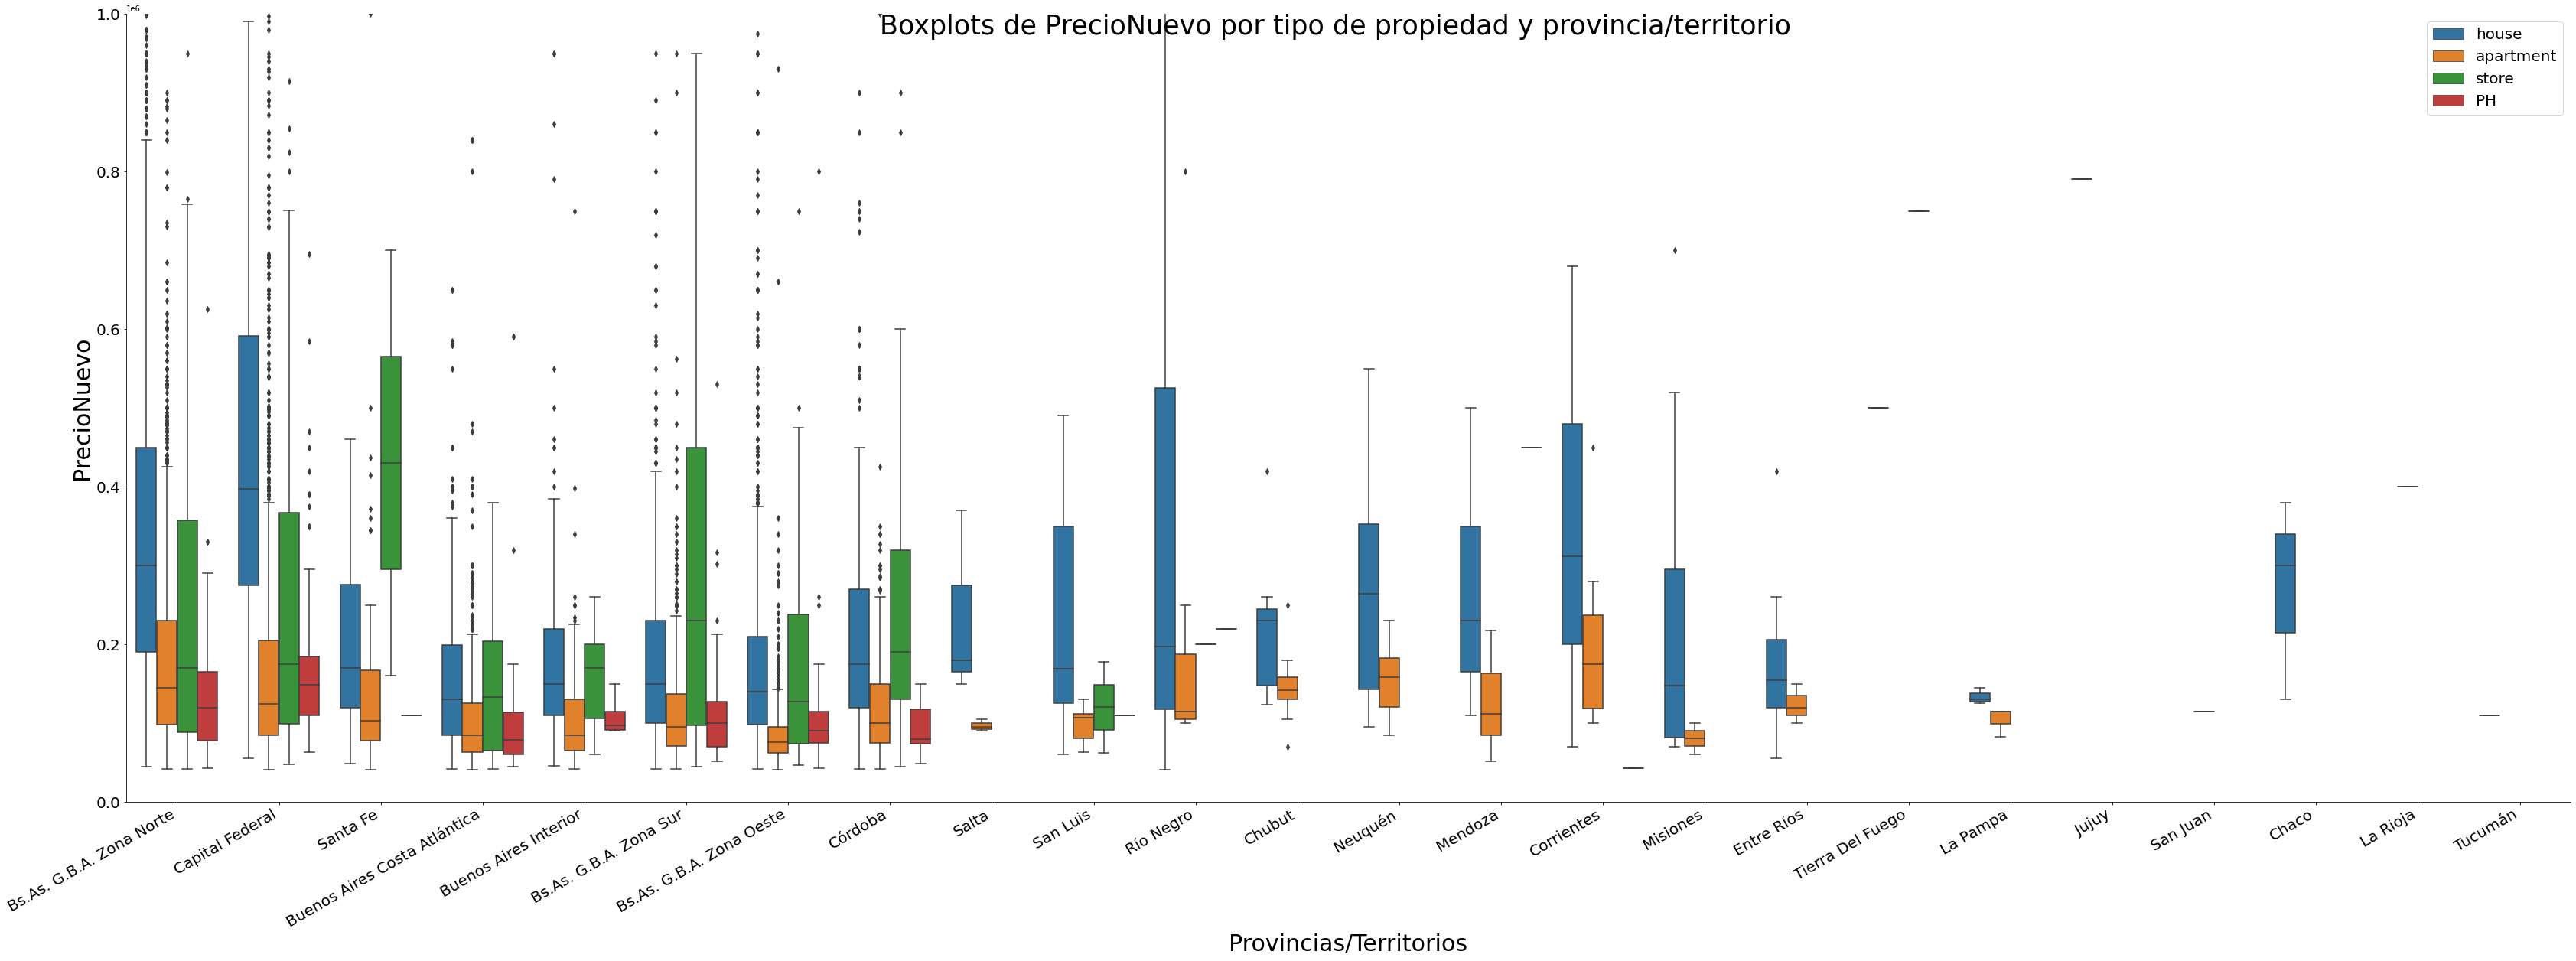

In [375]:
mask = dataNuevoDropColum.PrecioNuevo > 4e4
grafico_eliminar_outliers(dataNuevoDropColum.loc[mask],'PrecioNuevo',limite_y=1000000)

Al obtener datos que se agrupan en rangos esperables para propiedades los volcamos en la columna "price_aprox_usd" en caso de que esta misma tenga valor nulo.

Tambien filtramos los datos obtenidos por regex dejando solo aquellos superiores a 40,000 U\$D, ya que hay informacion de cocheras opcionales con precios entre 35,000 y 20,000 U\
$D.

In [376]:
mask = dataNuevoDropColum.price.isnull() & (dataNuevoDropColum.PrecioNuevo > 4e4)
print(f'Se logro completar {mask.sum()} filas')
dataNuevoDropColum.loc[mask,'price_aprox_usd'] = dataNuevoDropColum.loc[mask,'PrecioNuevo']

Se logro completar 1932 filas


In [377]:
dataNuevoDropColum.drop(columns=['PrecioNuevo','price','currency','price_aprox_local_currency'],inplace=True)

In [378]:
dataNuevoDropColum.isnull().sum()

property_type                0
place_name                   0
price_aprox_usd          12433
surface_total_in_m2          0
surface_covered_in_m2    16178
price_usd_per_m2         42255
price_per_m2             25700
rooms                    58178
description                  2
title                        0
parent_lvl_1                 0
parent_lvl_2                 0
parent_lvl_3                 0
parent_lvl_4                 0
description_minus            0
title_minus                  0
balcon                       0
gimnasio                     0
pileta                       0
asador                       0
cochera                      0
lavanderia                   0
lavadero                     0
apto_prof                    0
baulera                      0
calefaccion                  0
solarium                     0
seguridad                    0
dtype: int64

<a id="section_outliers"></a> 
# **Eliminación de outliers**

Para eliminar outliers se toma el criterio de eliminar los puntos con valores superiores a Q3+1.5.IQR, e inferiores a Q1-1.5.IQR (si la cota inferior es negativa, se toma como valor cero).

Se generan funciones para filtrar y graficar los datos de las columnas de precio y superficie.

In [379]:
data_trabajo = dataNuevoDropColum.copy()

In [380]:
def EliminarOutliers2(data,campo,grupos):
  data_para_grafico = data.copy()
  data_eliminar = data.copy()

  Q1 = data_eliminar.groupby(grupos)[campo[0]].quantile(0.25)
  Q3 = data_eliminar.groupby(grupos)[campo[0]].quantile(0.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  mask = limite_inferior < 0
  limite_inferior[mask] = 0

  limite_superior = Q3 + 1.5 * IQR

  for i in limite_inferior.index:

    mask_excede_inferior = data.loc[(data_para_grafico.property_type == i[0]) & (data_para_grafico.parent_lvl_1 == i[1]),campo[0]] < limite_inferior[i]
    mask_excede_superior = data.loc[(data_para_grafico.property_type == i[0]) & (data_para_grafico.parent_lvl_1 == i[1]),campo[0]] > limite_superior[i]
    mask_excede = mask_excede_inferior | mask_excede_superior
    data_eliminar.drop(index=mask_excede[mask_excede].index, inplace = True)
  
  limite_y_primer_grafico = grafico_eliminar_outliers(data_eliminar,campo[0], fin_titulo = 'después de filtrar')

  grafico_eliminar_outliers(data_para_grafico,campo[0],limite_y_primer_grafico, fin_titulo = 'antes de filtrar')

  print(f'Se inició con {data_para_grafico.shape[0]} filas y quedaron {data_eliminar.shape[0]}')

  return data_eliminar

In [381]:
data_trabajo.drop(index=[94884,43252],inplace=True)
#data_trabajo.loc[(data_trabajo.parent_lvl_1 == 'Misiones') & (data_trabajo.property_type == 'store')].tail(1)

#Se elimina una fila del DF por tener 'surface_covered_in_m2' muy alta y no ser filtrada ya que misiones solo tiene 2 propiedades con 'surface_covered_in_m2'.

Se grafican diagramas de cajas para poder visualizar el antes y el después de la eliminación de los outliers. 

### Eliminacion de Outliers de 'price_aprox_usd'

Se inició con 98090 filas y quedaron 91476


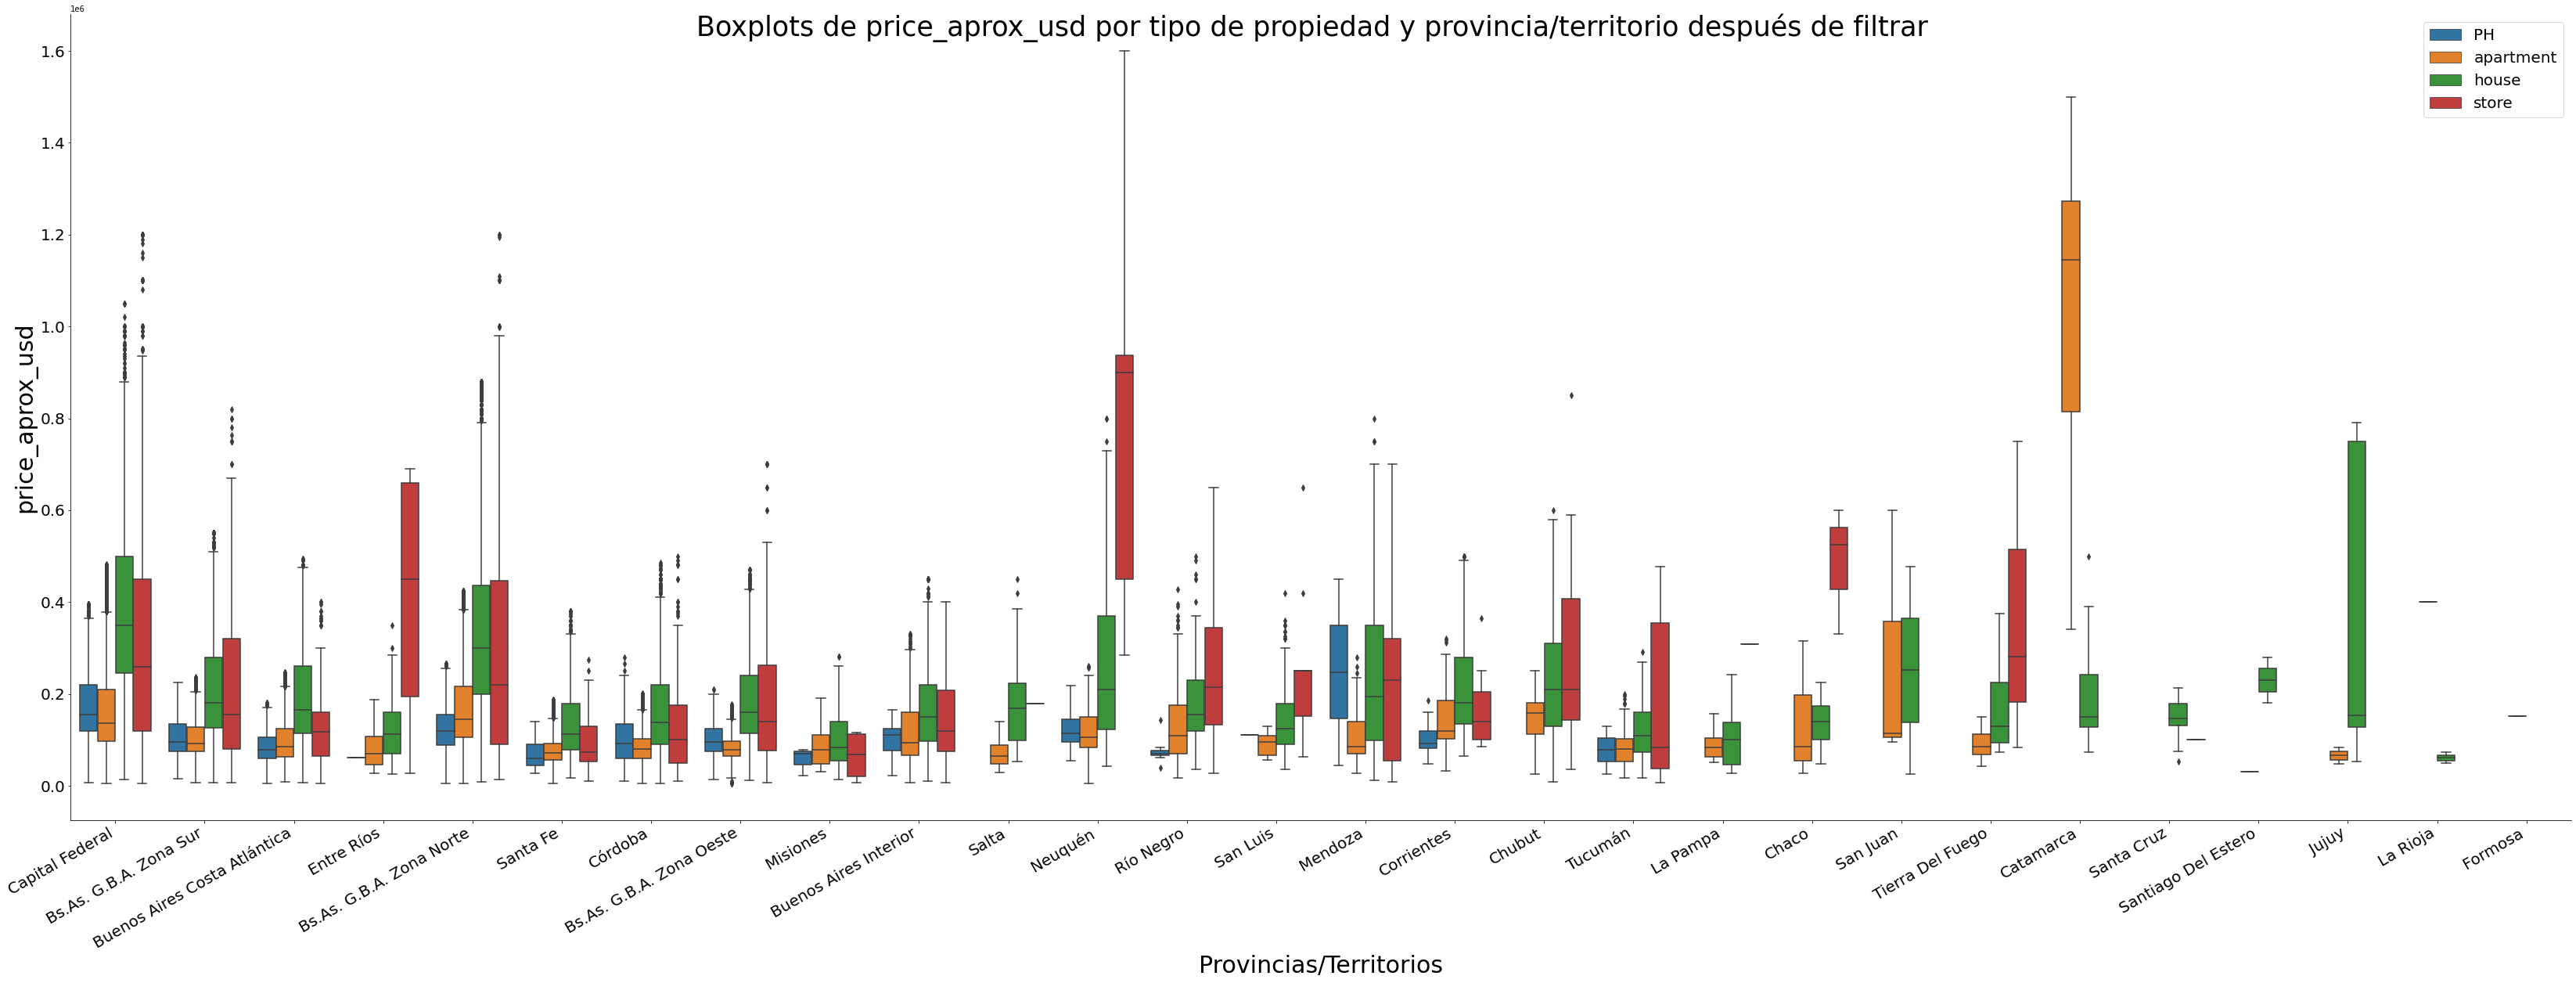

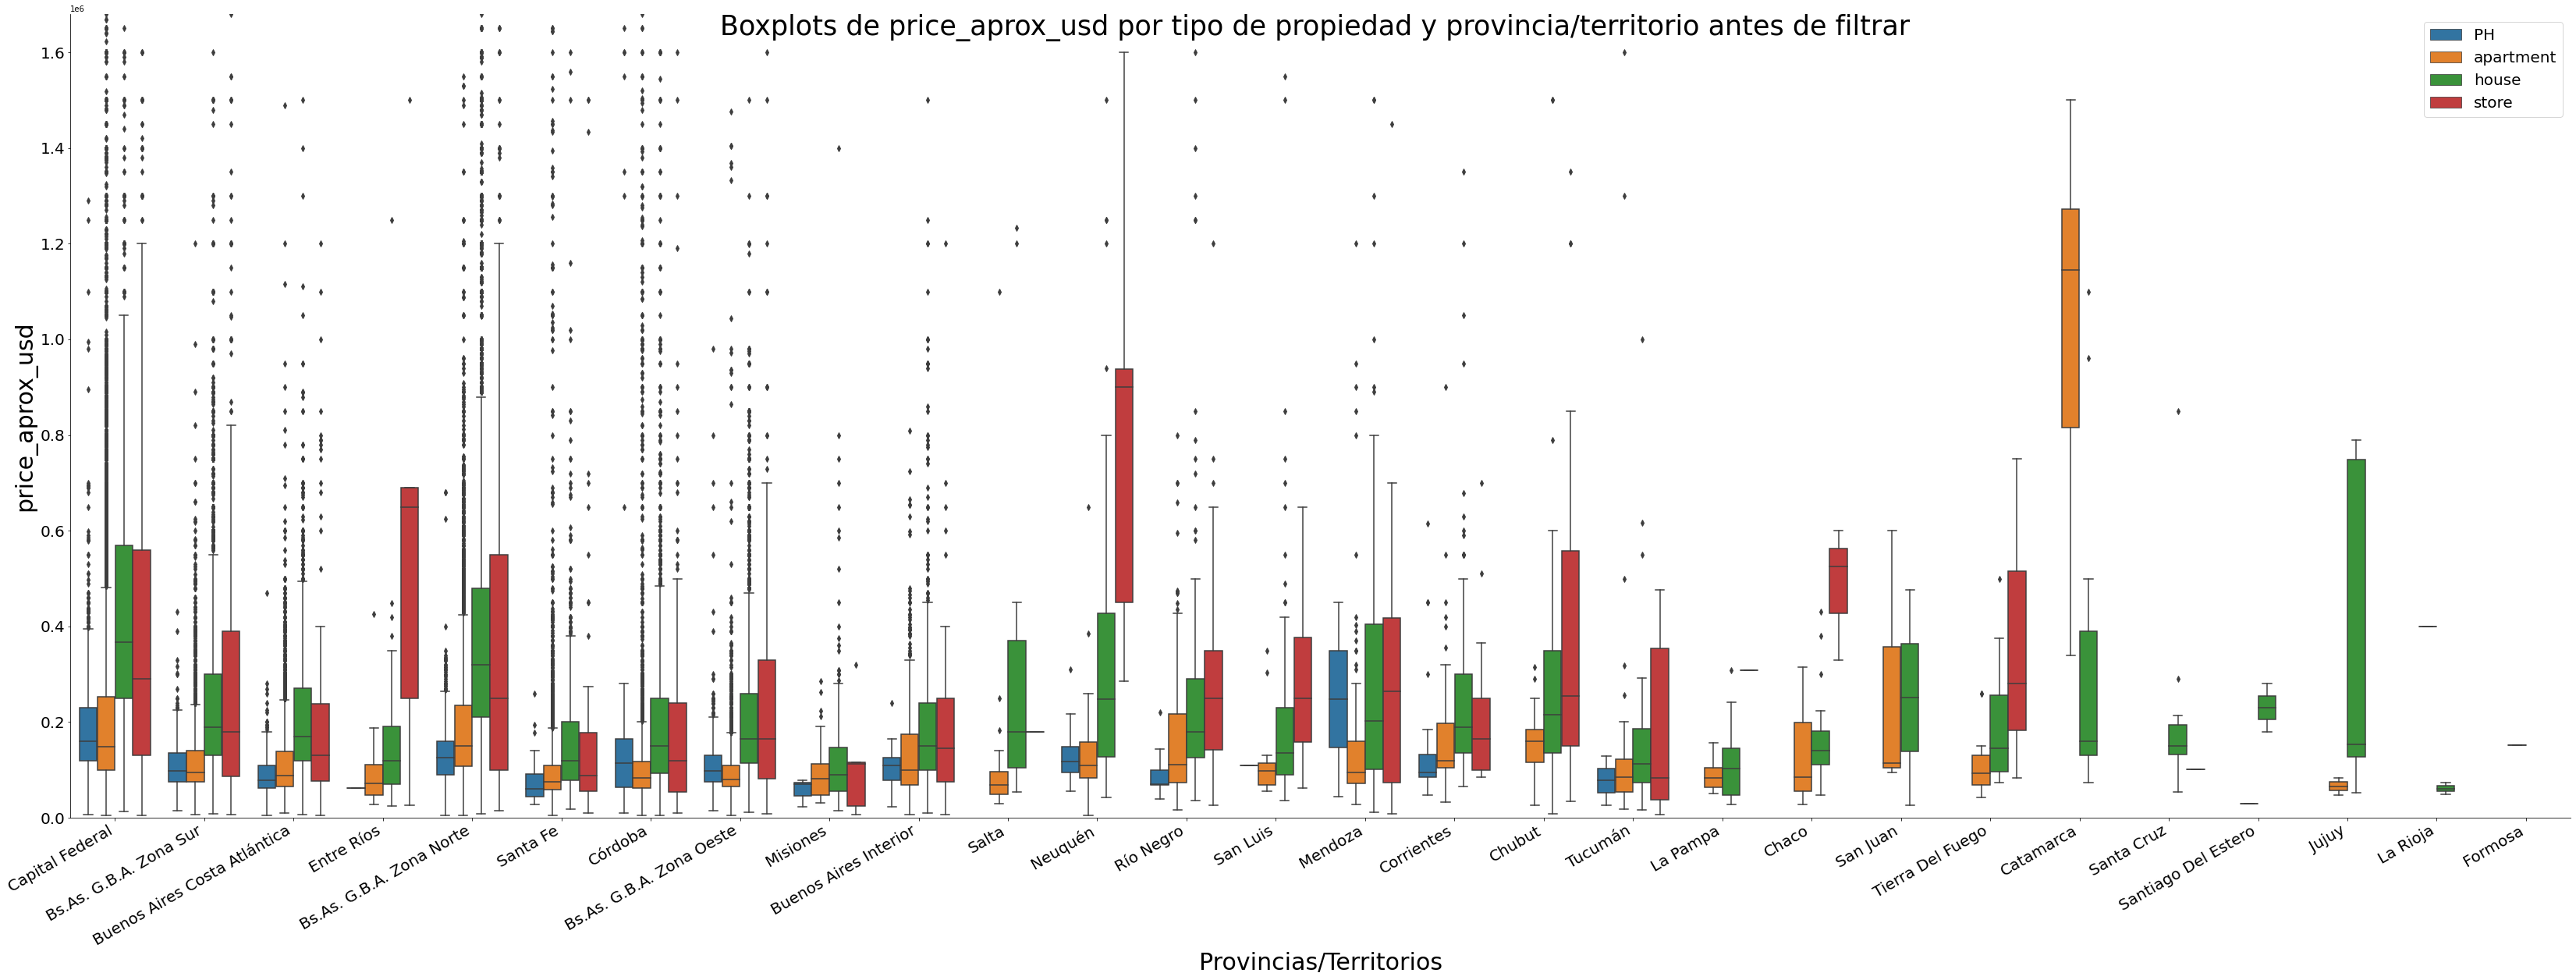

In [382]:
grupos = ['property_type','parent_lvl_1']
campo = ['price_aprox_usd']
 
data_trabajo = EliminarOutliers2(data_trabajo,campo,grupos)

### Eliminacion de Outliers de 'surface_covered_in_m2'

Se inició con 91476 filas y quedaron 88130


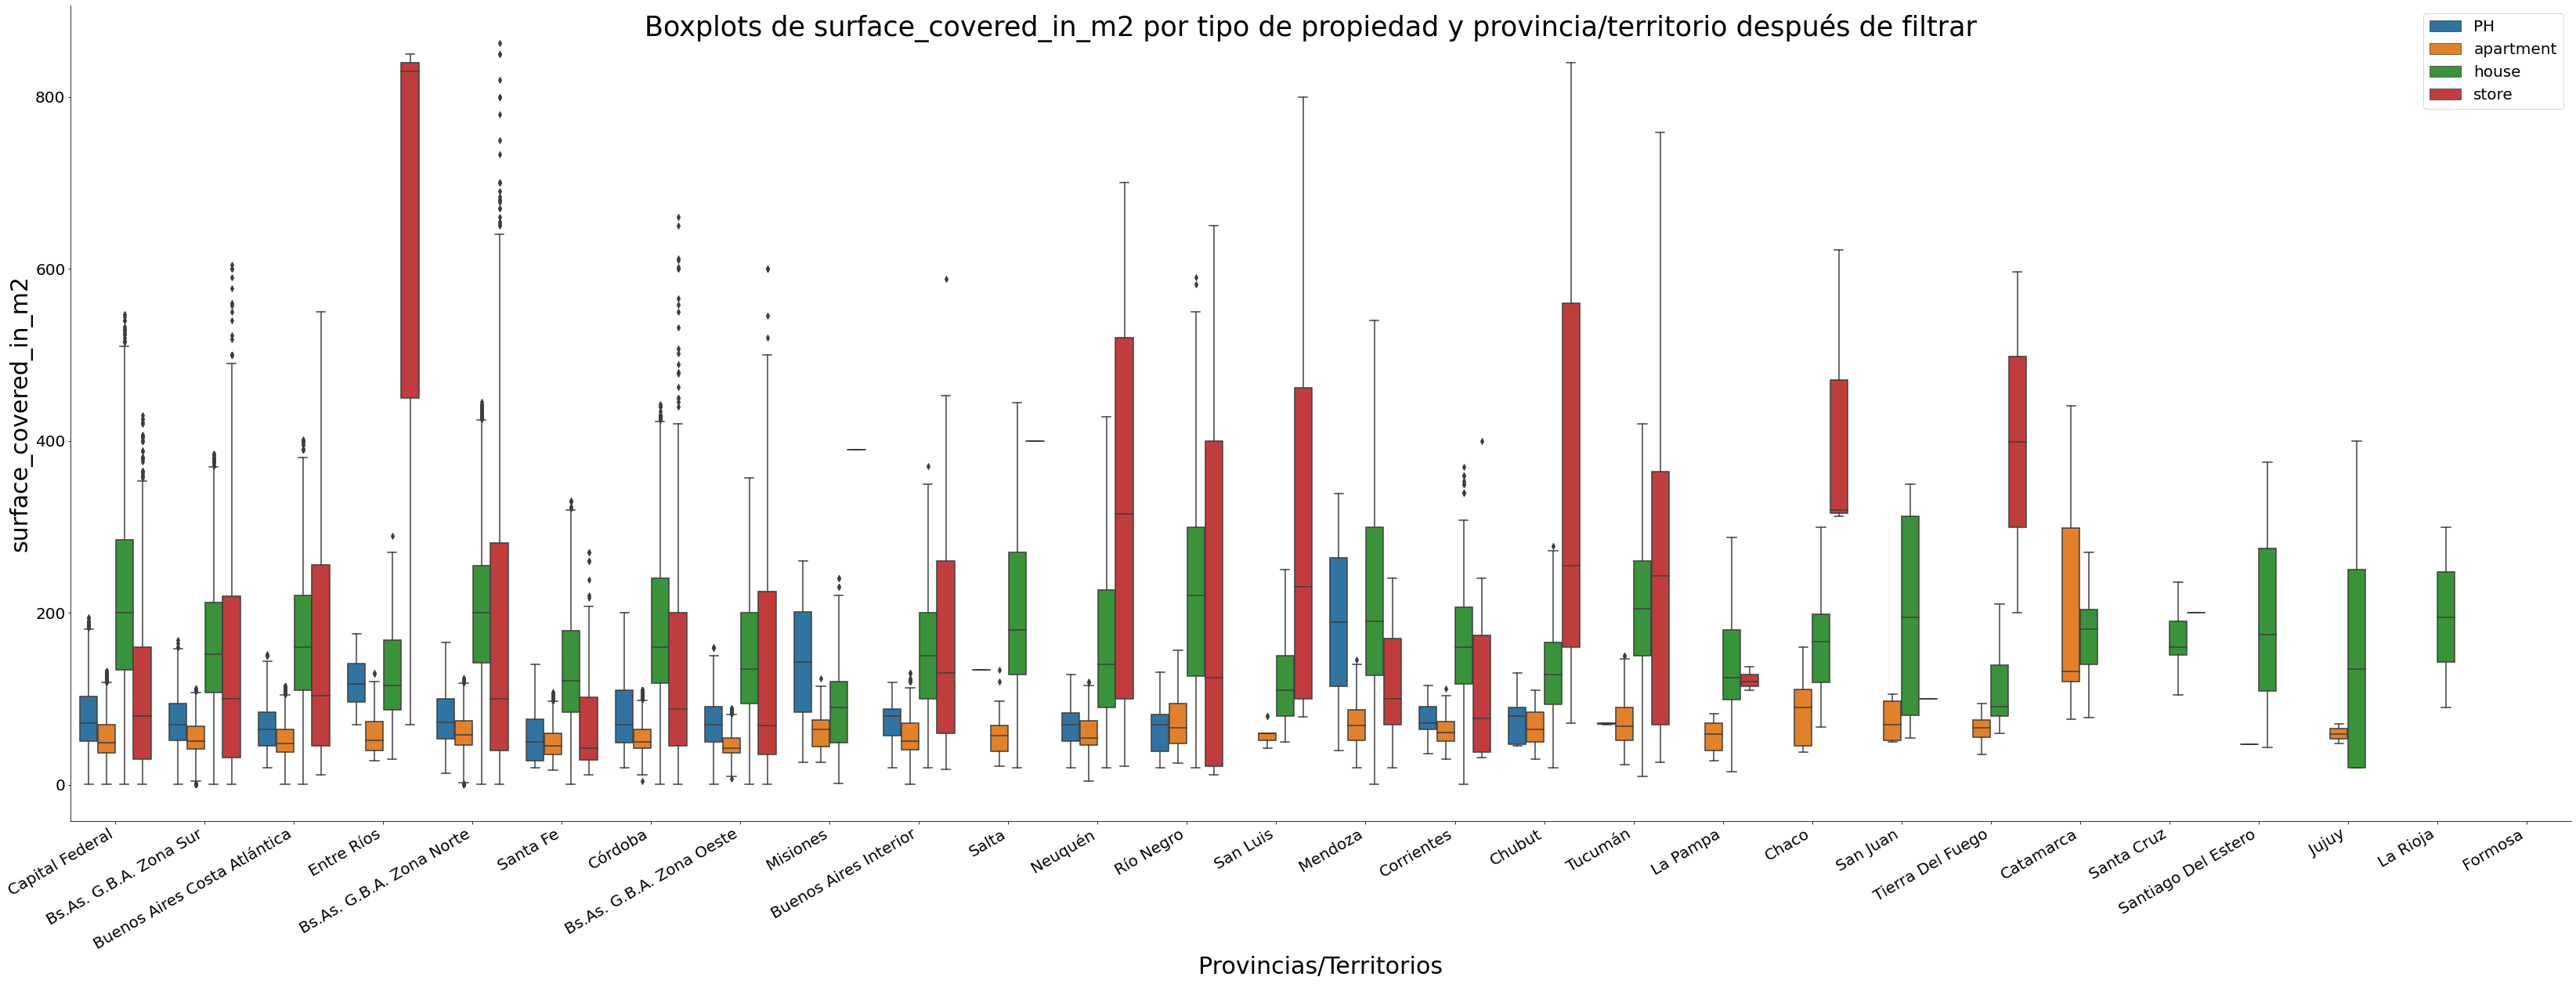

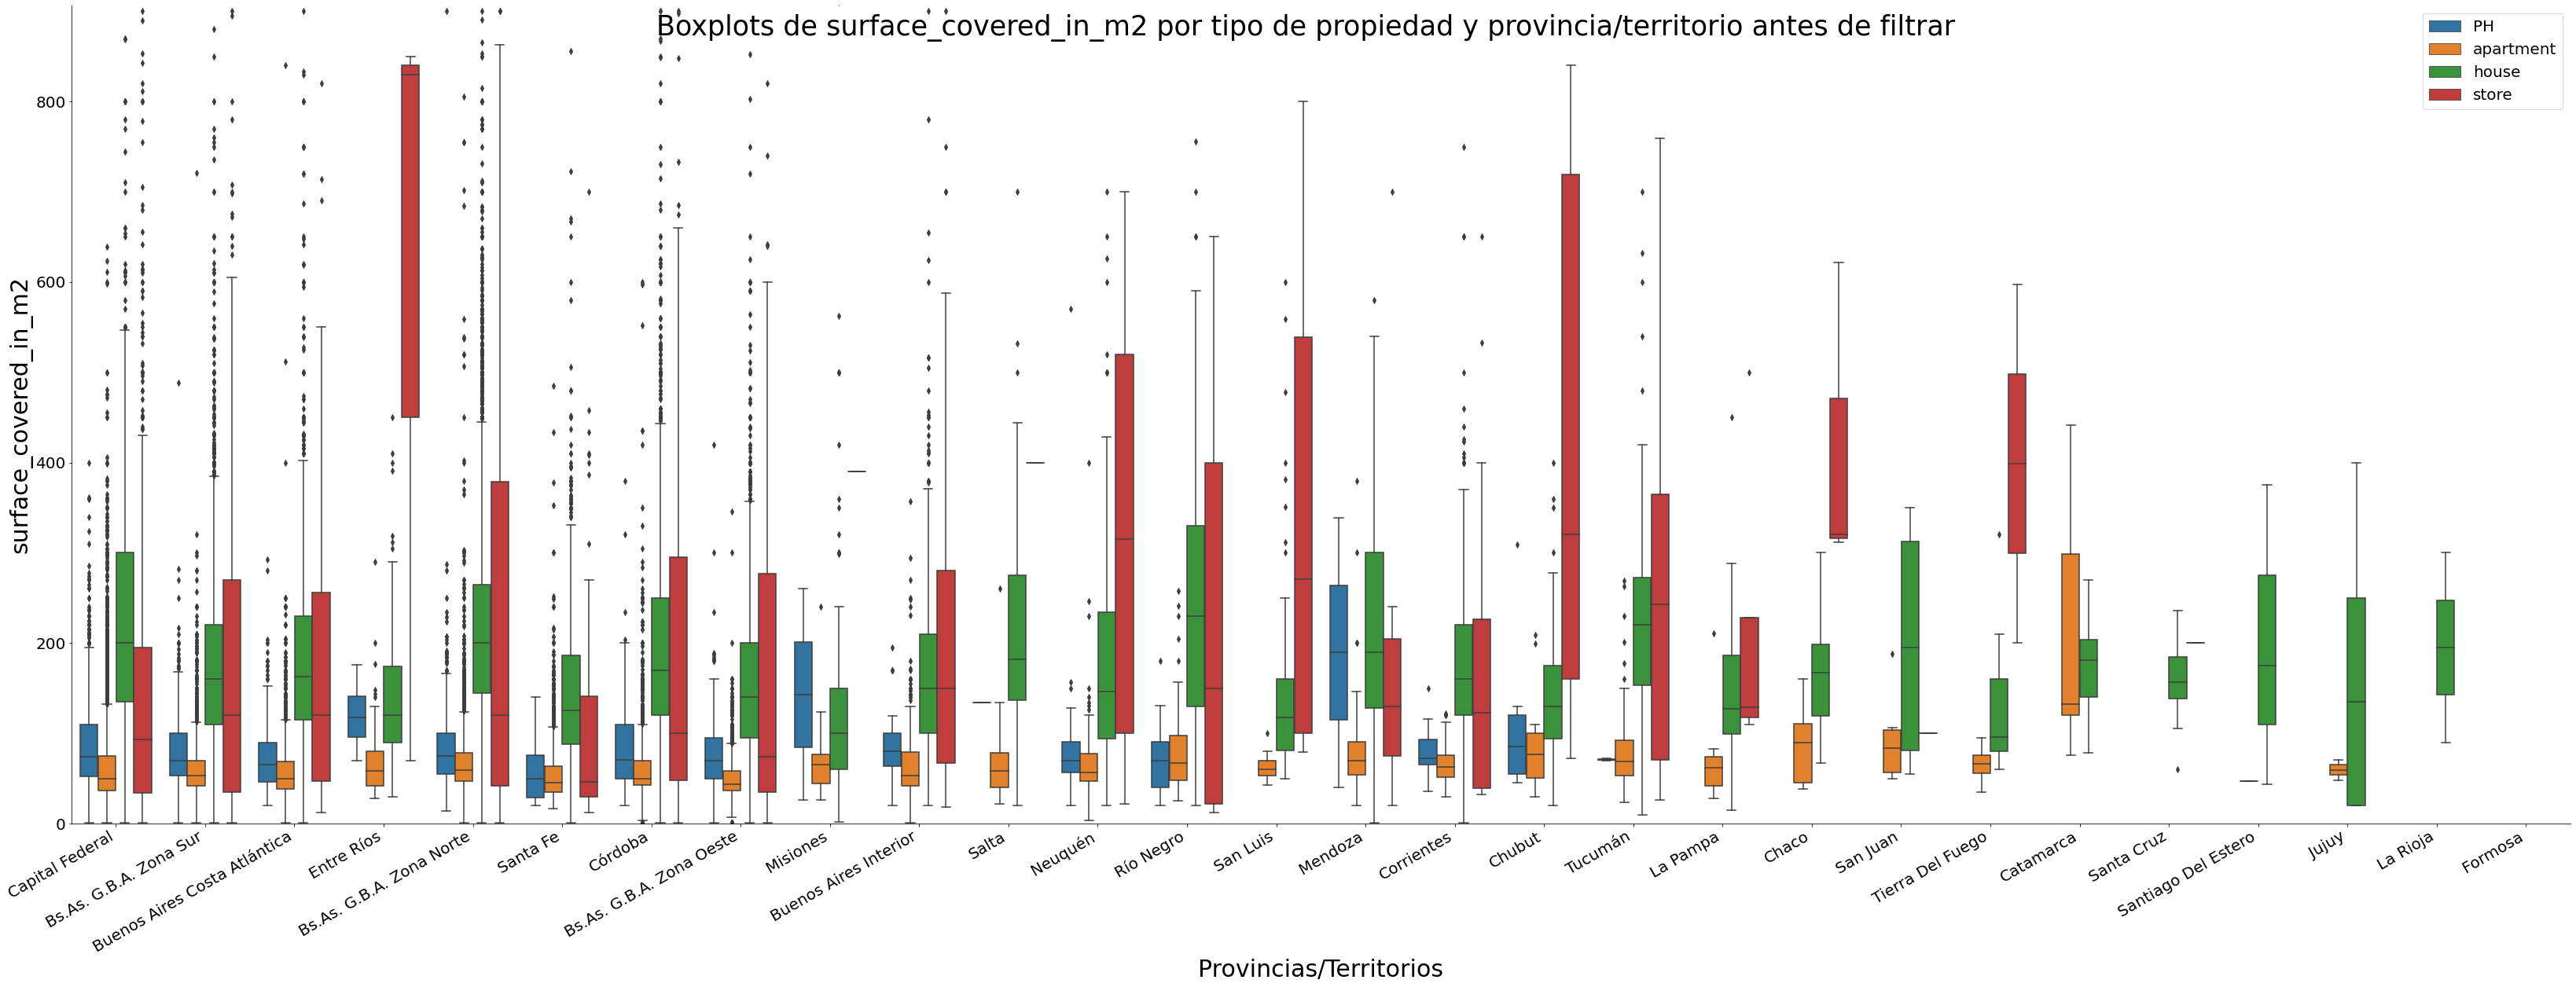

In [383]:
grupos = ['property_type','parent_lvl_1']
campo = ['surface_covered_in_m2']

data_trabajo = EliminarOutliers2(data_trabajo,campo,grupos)

### Eliminacion de Outliers de 'surface_covered_in_m2'

Se inició con 88130 filas y quedaron 83418


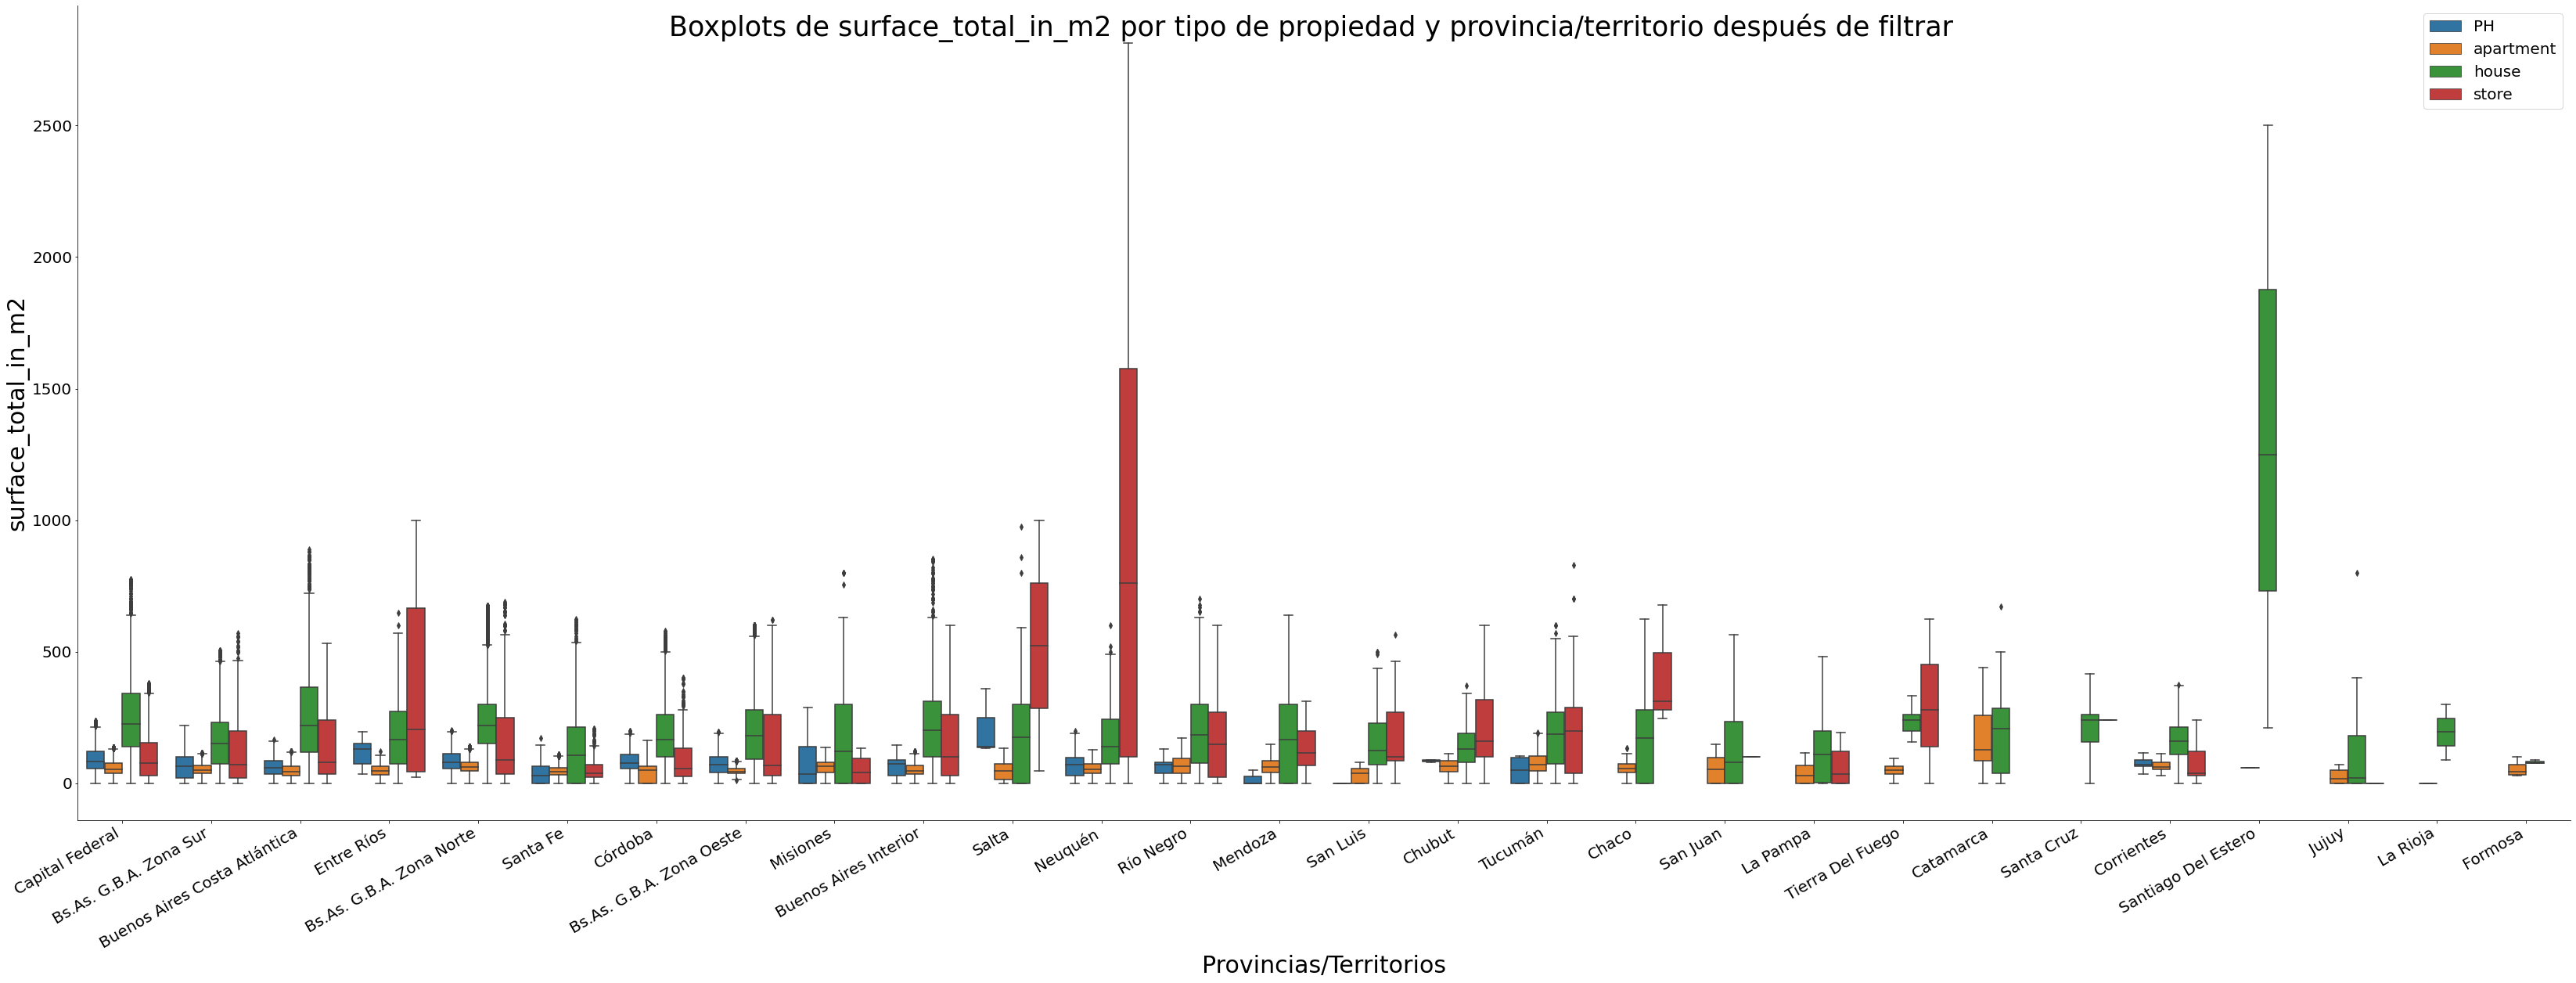

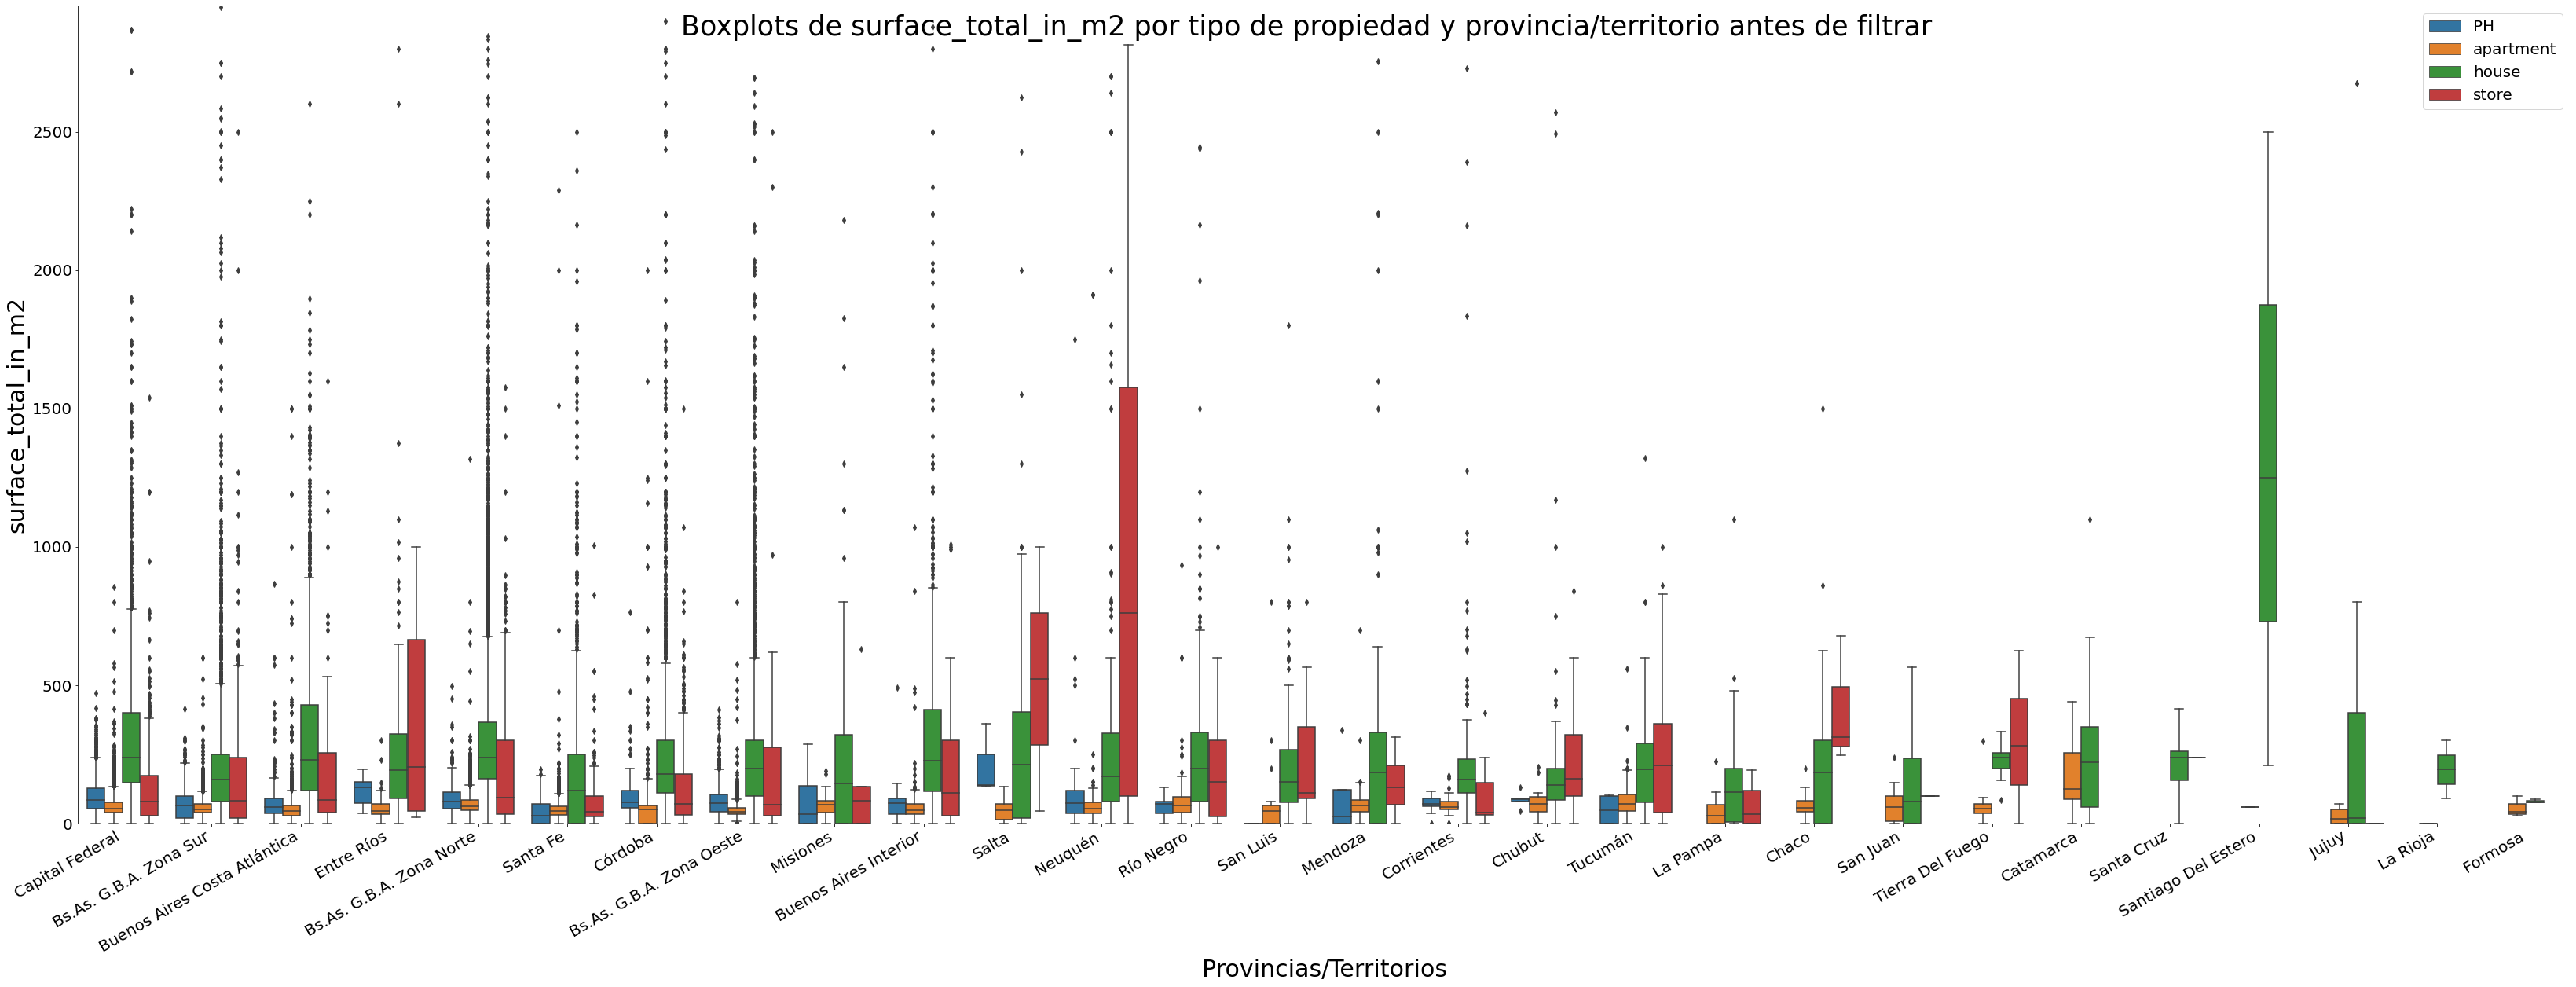

In [384]:
grupos = ['property_type','parent_lvl_1']
campo = ['surface_total_in_m2']

data_trabajo = EliminarOutliers2(data_trabajo,campo,grupos)

In [385]:
dataNuevoDropColum = data_trabajo.copy()

<a id="section_imputacion"></a> 
# **Imputación de datos luego de eliminar outliers**

Definimos las funciones que utilizaremos

In [386]:
data_trabajo = dataNuevoDropColum.copy()

In [387]:
def plus_30_mean(x):
  if (x.notnull().mean() > 0.3) & (x.notnull().sum() > 6):
    return x.mean()
  else:
    return np.NaN

In [388]:
def filler(data,grupos,campo,funcion):
  df_means = data.groupby(by=grupos)[campo[0]].aggregate(funcion)
  df_filled = data.copy()

  for i in df_means.index:
    df_filled.loc[(df_filled.property_type == i[0]) & (df_filled.parent_lvl_1 == i[1]) & data.loc[:,campo[0]].isnull(),campo] = df_means[i]
  
  print(f'El porcentaje de nulos inicial era de {round(data.loc[:,campo[0]].isnull().mean()*100,2)}% y luego de imputar la cantidad de nulos es de {round(df_filled.loc[:,campo[0]].isnull().mean()*100,2)}%')
  return df_filled

Imputamos los valores faltantes de "price_aprox_usd" con el valor medio de cada grupo y graficamos el resultado.

In [389]:
grupos = ['property_type','parent_lvl_1']
campo = ['price_aprox_usd']

data_trabajo = filler(data_trabajo,grupos,campo,plus_30_mean)

El porcentaje de nulos inicial era de 12.61% y luego de imputar la cantidad de nulos es de 0.33%


1679766.669

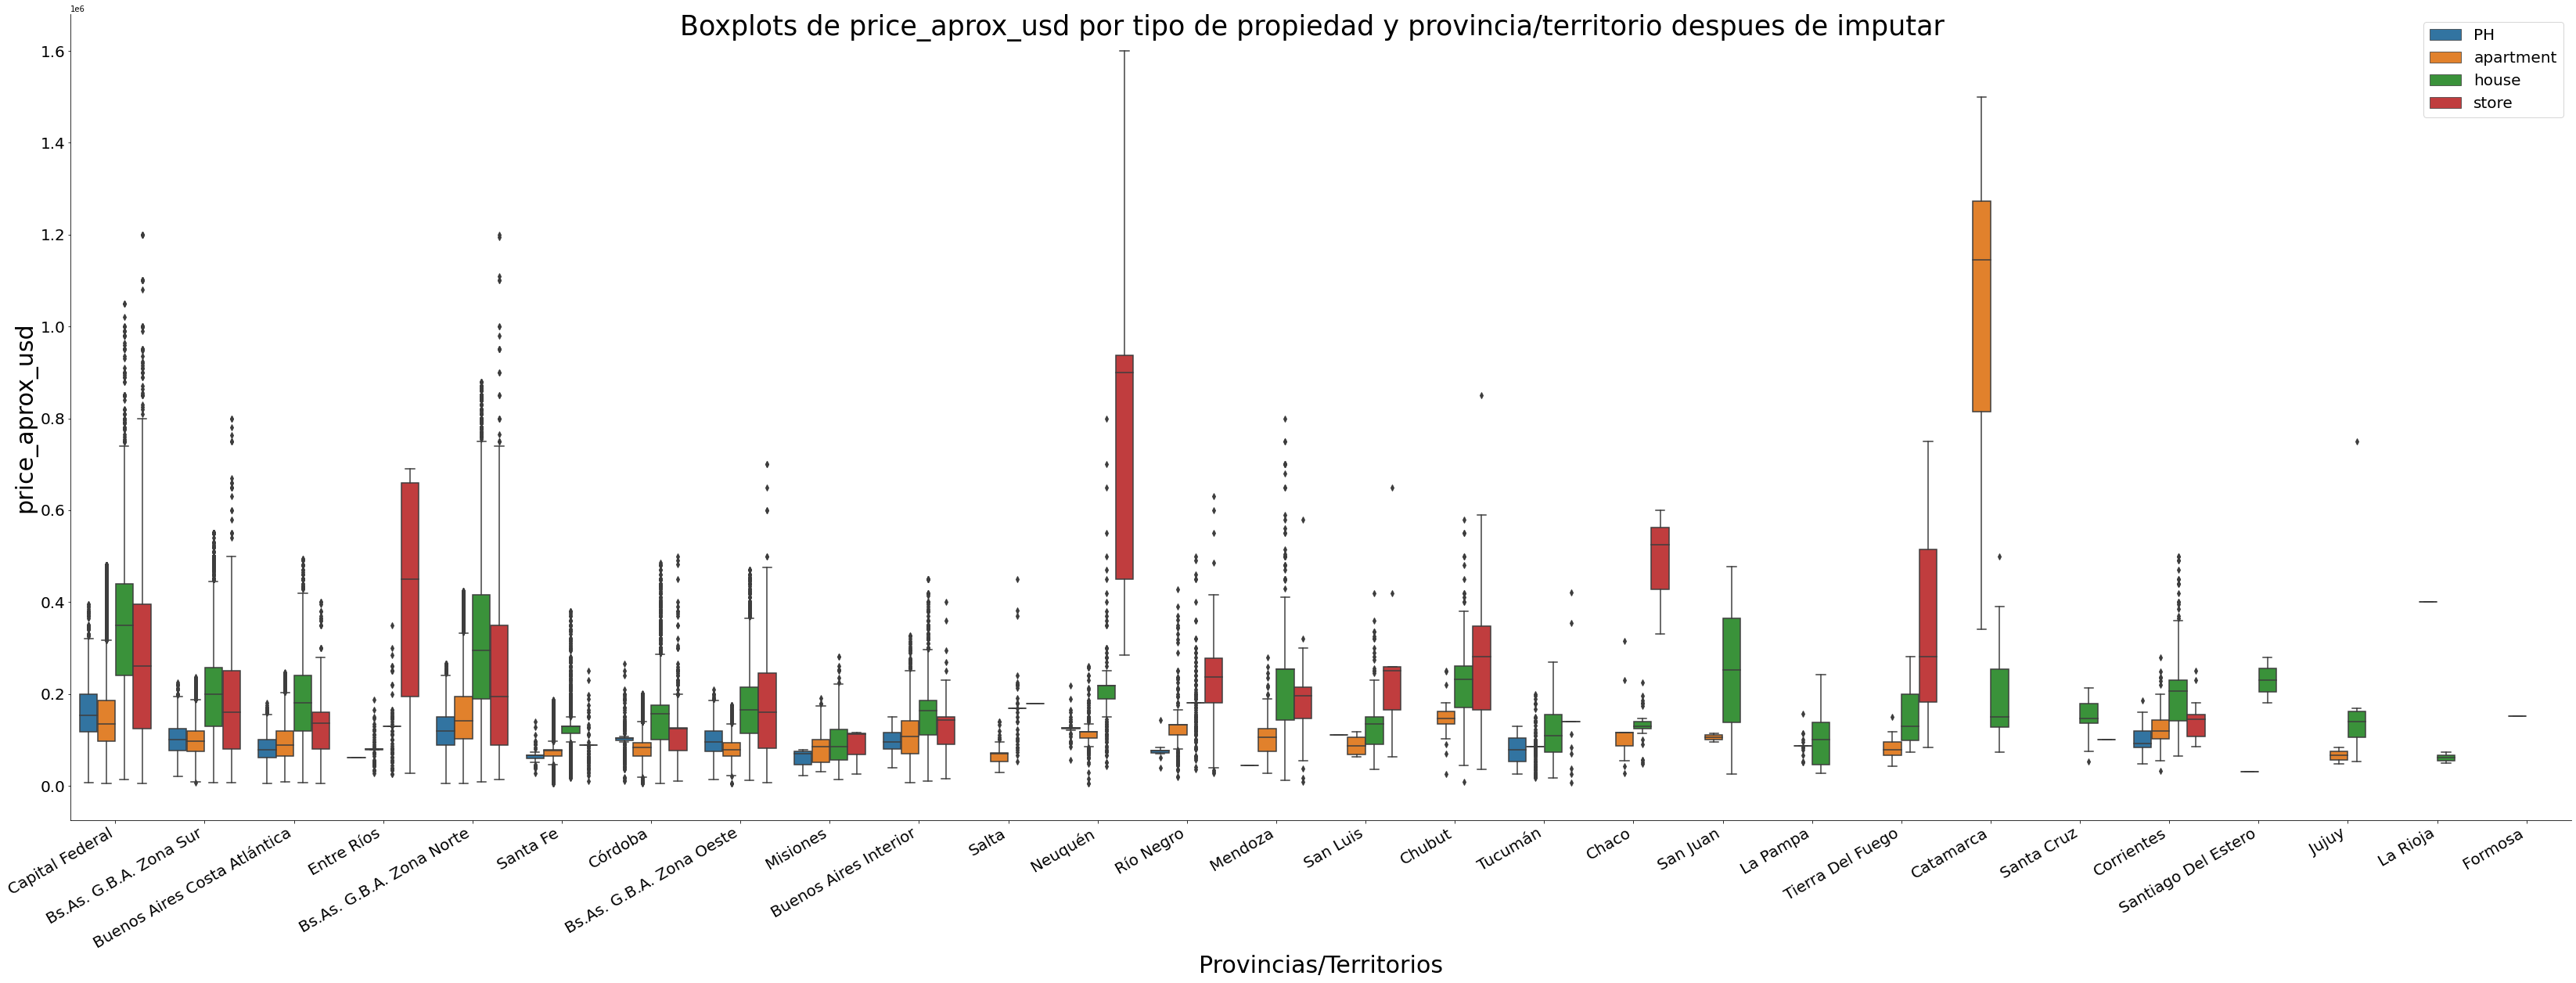

In [390]:
grafico_eliminar_outliers(data_trabajo,campo[0], fin_titulo = 'despues de imputar')

Imputamos los valores faltantes de "surface_total_in_m2" con el valor medio de cada grupo y graficamos el resultado.

In [391]:
grupos = ['property_type','parent_lvl_1']
campo = ['surface_total_in_m2']

data_trabajo = filler(data_trabajo,grupos,campo,plus_30_mean)

El porcentaje de nulos inicial era de 0.0% y luego de imputar la cantidad de nulos es de 0.0%


2955.75

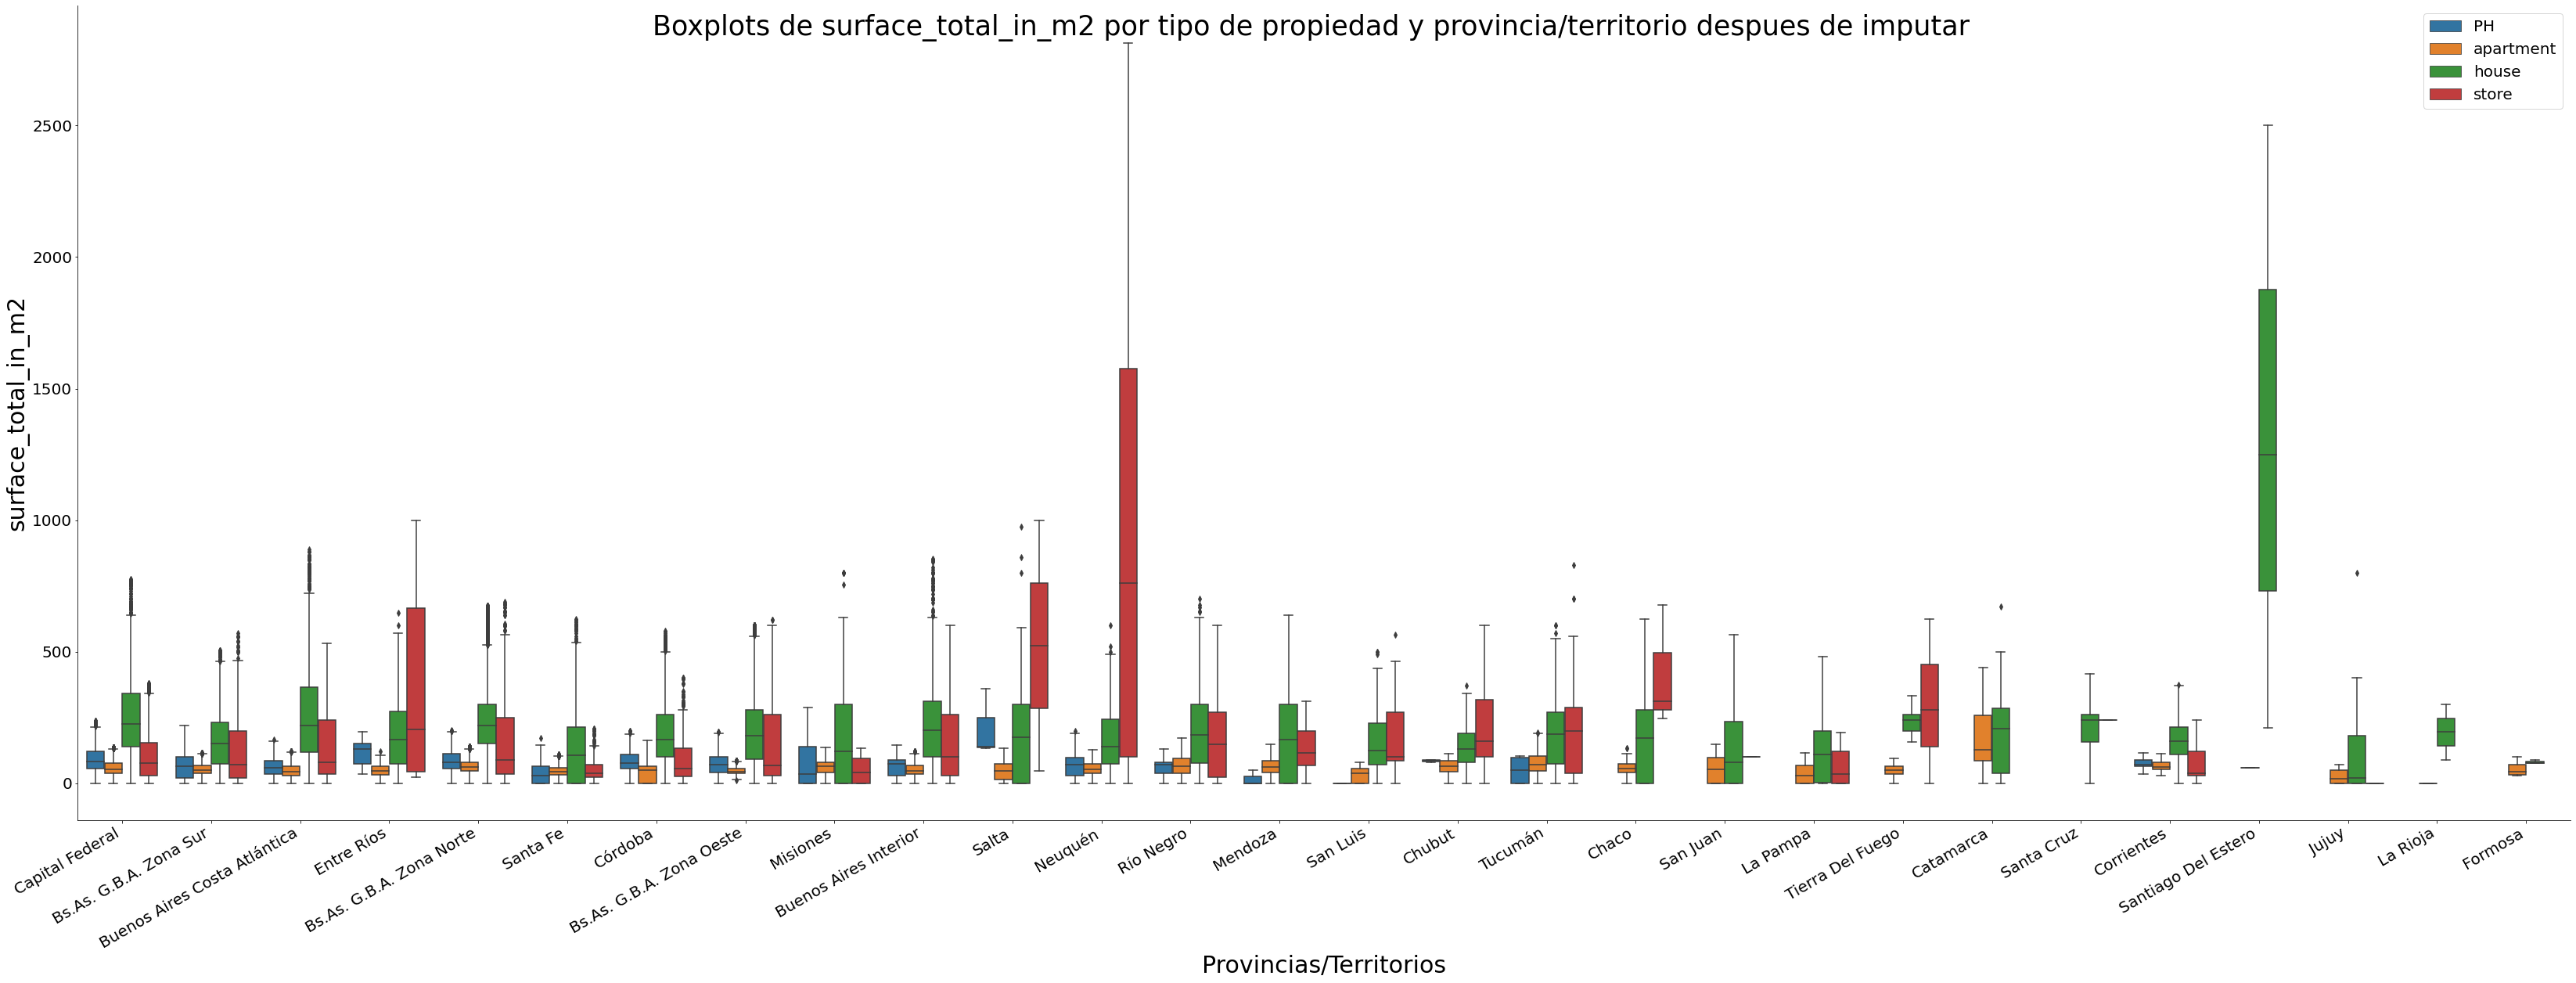

In [392]:
grafico_eliminar_outliers(data_trabajo,campo[0], fin_titulo = 'despues de imputar')

Generamos una nueva columna cuyo valos es el cociente entre la superficie cuvierta sobre la superficie total de cada fila.

In [393]:
data_trabajo['covered/total_relation'] = data_trabajo.surface_covered_in_m2 / data_trabajo.surface_total_in_m2

Completamos los nulos de "covered_relation/total" con la media de cada grupo, considetrando que propiedades del mismo tipo y misma provincia suelen tener similar relacion entre superficies. A su vez reduce el numero de filas con valores incongruentes en donde la propiedad tiene mas metros cuadrados cuviertos que totales.

In [394]:
def filler_relation(data,grupos,campo_relation,campo_fill,campo_source,funcion):
  df_means = data.groupby(by=grupos)[campo_relation[0]].aggregate(funcion)
  df_filled = data.copy()

  for i in df_means.index:
    mask = (df_filled.property_type == i[0]) & (df_filled.parent_lvl_1 == i[1]) & data.loc[:,campo_fill[0]].isnull()
    df_filled.loc[mask,campo_fill[0]] = df_filled.loc[mask,campo_source[0]] * df_means[i]
  
  print(f'El porcentaje de nulos inicial era de {round(data.loc[:,campo_fill[0]].isnull().mean()*100,2)}% y luego de imputar la cantidad de nulos es de {round(df_filled.loc[:,campo_fill[0]].isnull().mean()*100,2)}%')
  return df_filled

Completamos lo valores nulos de "surface_covered_in_m2" utilizando los valores "covered/total_relation" y "surface_total_in_m2"

In [395]:
grupos = ['property_type','parent_lvl_1']
campo_relation = ['covered/total_relation']
campo_fill = ['surface_covered_in_m2']
campo_source = ['surface_total_in_m2']

data_trabajo = filler_relation(data_trabajo, grupos, campo_relation=campo_relation, campo_fill=campo_fill, campo_source=campo_source,funcion=np.mean )

El porcentaje de nulos inicial era de 17.45% y luego de imputar la cantidad de nulos es de 0.02%


In [396]:
data_trabajo.drop(columns=['covered/total_relation'],inplace=True)

In [397]:
data_trabajo.isnull().sum()

property_type                0
place_name                   0
price_aprox_usd            276
surface_total_in_m2          0
surface_covered_in_m2       18
price_usd_per_m2         36997
price_per_m2             22156
rooms                    49567
description                  2
title                        0
parent_lvl_1                 0
parent_lvl_2                 0
parent_lvl_3                 0
parent_lvl_4                 0
description_minus            0
title_minus                  0
balcon                       0
gimnasio                     0
pileta                       0
asador                       0
cochera                      0
lavanderia                   0
lavadero                     0
apto_prof                    0
baulera                      0
calefaccion                  0
solarium                     0
seguridad                    0
dtype: int64

Eliminamos todas las filas con algun nulos en las columnas que imputamos.

In [398]:
data_trabajo.dropna(axis=0,subset=['surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','description'],how='any',inplace=True)

Generamos nuevas columnas entre el precio y los campos de superficie para verificar que relacion hay con los campos originales price_usd_per_m2' y 'price_per_m2'

In [399]:
data_trabajo['price_per_total_m2'] = data_trabajo.price_aprox_usd/data_trabajo.surface_total_in_m2

In [400]:
data_trabajo['price_per_covered_m2'] = data_trabajo.price_aprox_usd/data_trabajo.surface_covered_in_m2

<AxesSubplot:>

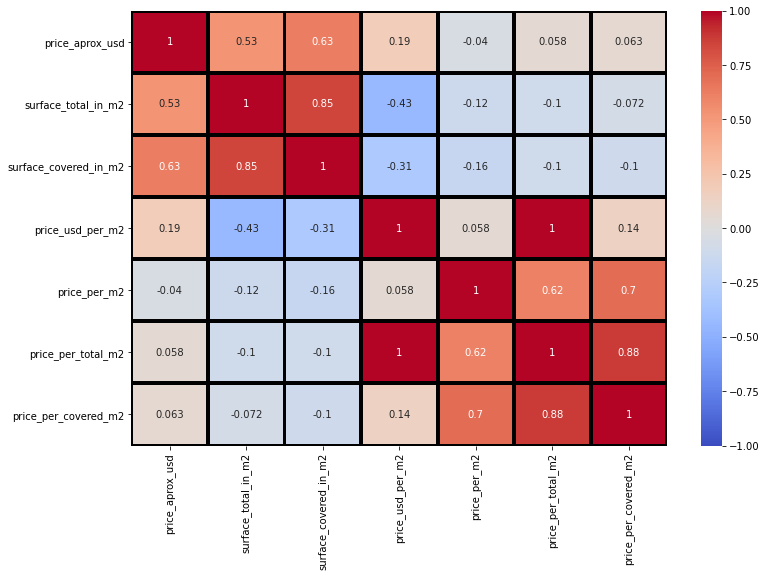

In [401]:
fig, ax1 = plt.subplots(1, 1,figsize=(12,8))
sns.heatmap(data_trabajo.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','price_per_total_m2','price_per_covered_m2']].corr(), annot = True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black',ax=ax1)

Vemos una relacion entre "price_usd_per_m2" y "price_per_total_m2".

De todos modos eliminamos las columnas nuevas y retenemos las generadas.

In [402]:
data_trabajo.drop(columns=['price_usd_per_m2','price_per_m2'],inplace=True)

In [403]:
data_trabajo.isnull().sum()

property_type                0
place_name                   0
price_aprox_usd              0
surface_total_in_m2          0
surface_covered_in_m2        0
rooms                    49328
description                  0
title                        0
parent_lvl_1                 0
parent_lvl_2                 0
parent_lvl_3                 0
parent_lvl_4                 0
description_minus            0
title_minus                  0
balcon                       0
gimnasio                     0
pileta                       0
asador                       0
cochera                      0
lavanderia                   0
lavadero                     0
apto_prof                    0
baulera                      0
calefaccion                  0
solarium                     0
seguridad                    0
price_per_total_m2           0
price_per_covered_m2         0
dtype: int64

In [404]:
dataNuevoDropColum = data_trabajo.copy()

In [405]:
data_trabajo=dataNuevoDropColum.copy()

Por ultimo verificamos que todos los campos esten libres de valores nulos y agregamos algunos graficos.

In [406]:
data_trabajo["rooms"].isnull().sum()

49328

In [407]:
data_trabajo["rooms"] = data_trabajo["rooms"].fillna("Sin especificar")
data_trabajo.loc[:,"rooms"].value_counts()

Sin especificar    49328
2.0                 9603
3.0                 9339
4.0                 5298
1.0                 5043
5.0                 2380
6.0                  917
7.0                  471
8.0                  256
10.0                 148
9.0                  134
11.0                  58
12.0                  44
13.0                  26
14.0                  23
15.0                  16
17.0                  10
16.0                   8
20.0                   6
18.0                   5
22.0                   5
19.0                   3
21.0                   3
32.0                   2
23.0                   2
30.0                   2
25.0                   2
27.0                   1
31.0                   1
Name: rooms, dtype: int64

In [408]:
categorias = ["balcon","gimnasio","pileta","asador","cochera","lavanderia","lavadero", "apto_prof","baulera","calefaccion","solarium","seguridad"]
for i in categorias:
  data_trabajo[i] = data_trabajo[i].fillna(0)
data_harry.isnull().sum()

property_type            0
place_name               0
price_aprox_usd          0
surface_total_in_m2      0
surface_covered_in_m2    0
rooms                    0
description              0
title                    0
parent_lvl_1             0
parent_lvl_2             0
parent_lvl_3             0
parent_lvl_4             0
description_minus        0
title_minus              0
balcon                   0
gimnasio                 0
pileta                   0
asador                   0
cochera                  0
lavanderia               0
lavadero                 0
apto_prof                0
baulera                  0
calefaccion              0
solarium                 0
seguridad                0
price_per_total_m2       0
price_per_covered_m2     0
dtype: int64

Algunos valores de "price_per_total_m2" quedaron con valor np.inf por lo que son eliminados antes de filtrar los ourliers de las ultimas columnas generadas.

In [409]:
data_trabajo.drop(index=data_trabajo.index[data_trabajo.price_per_total_m2 == np.inf],inplace=True)

Se inició con 75034 filas y quedaron 71811


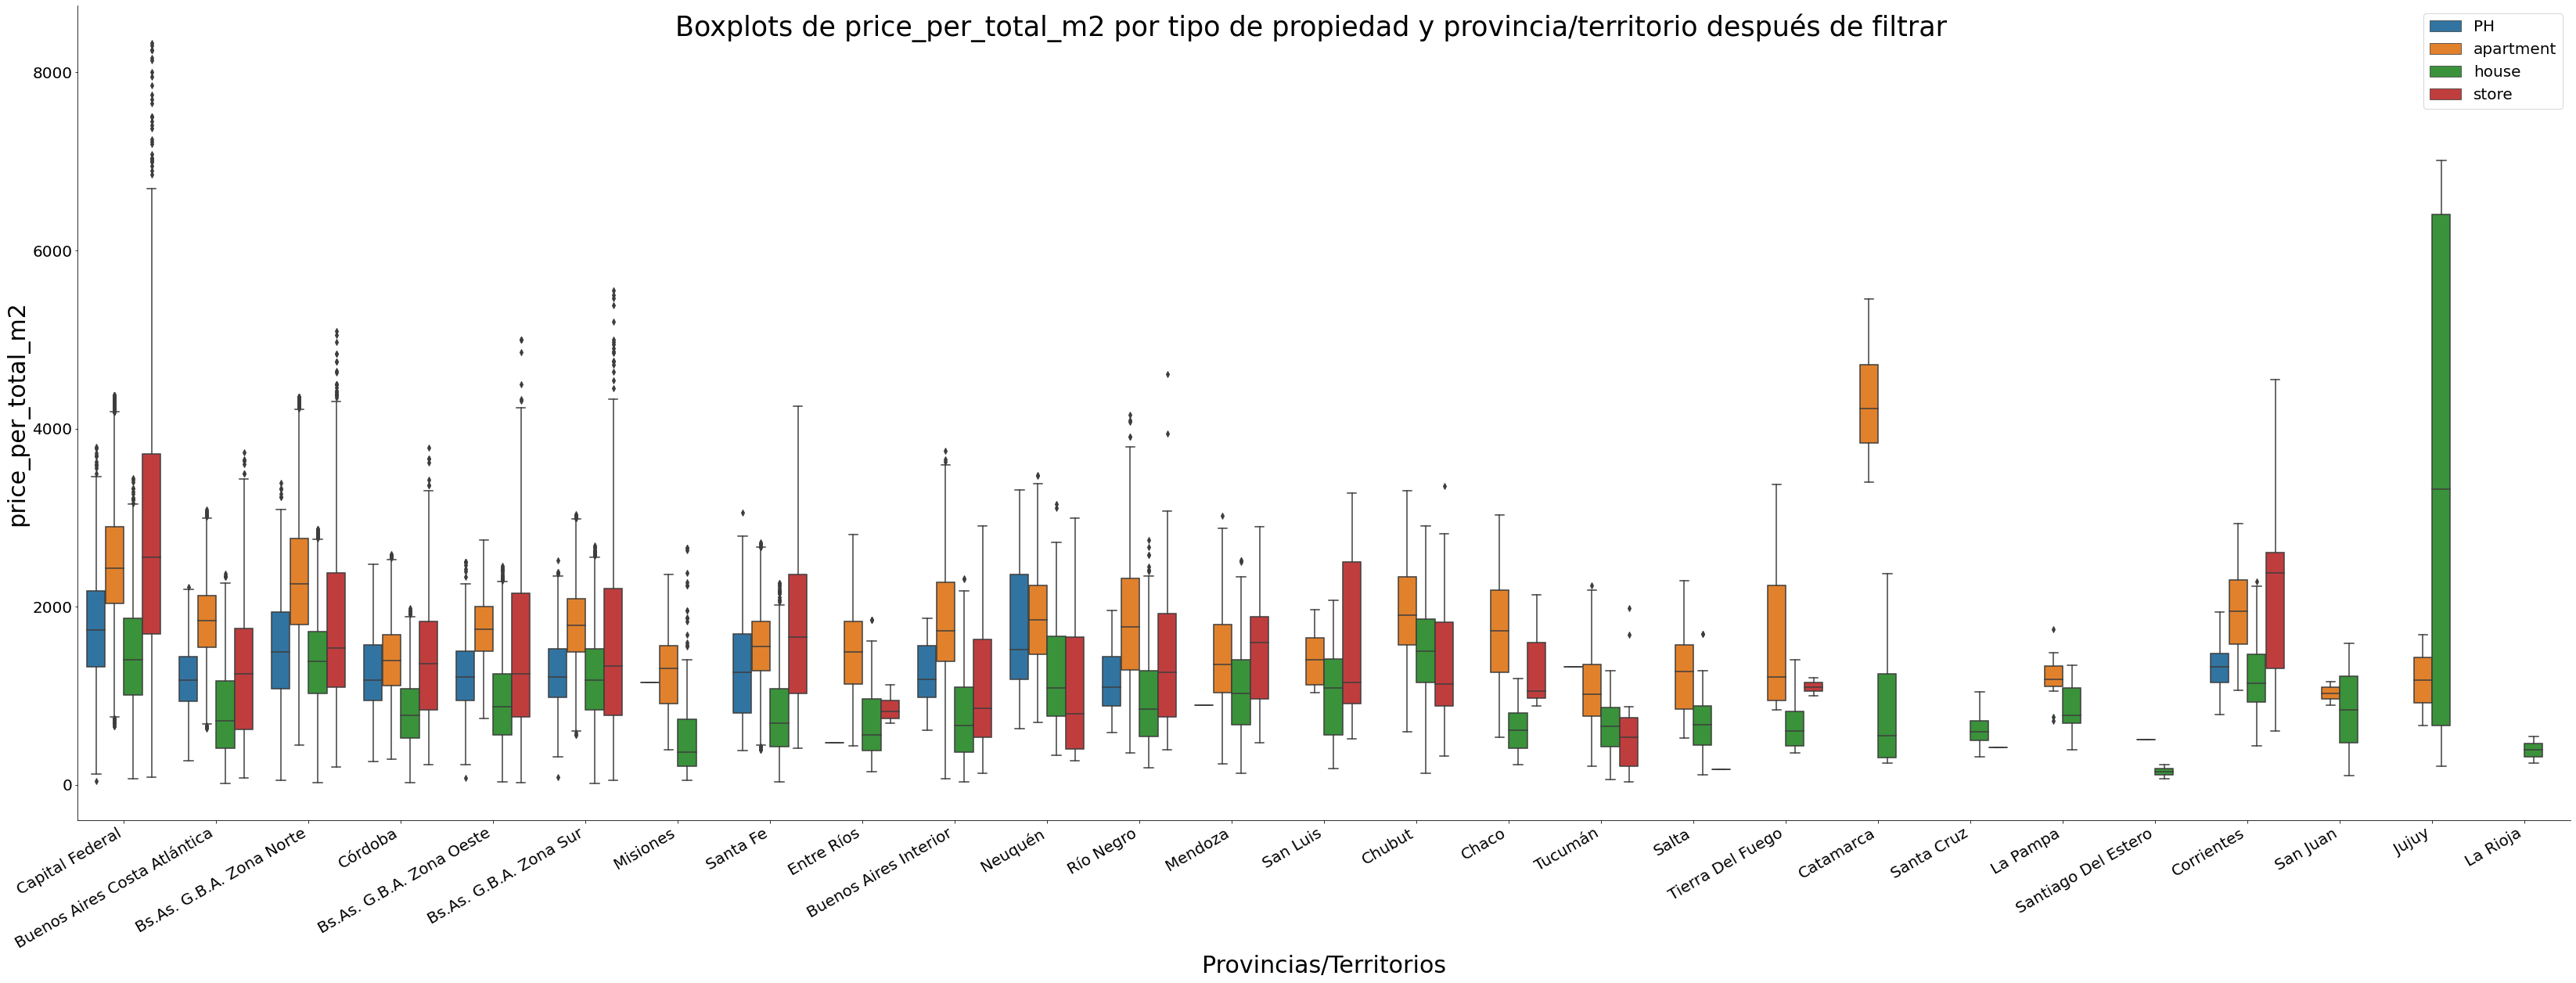

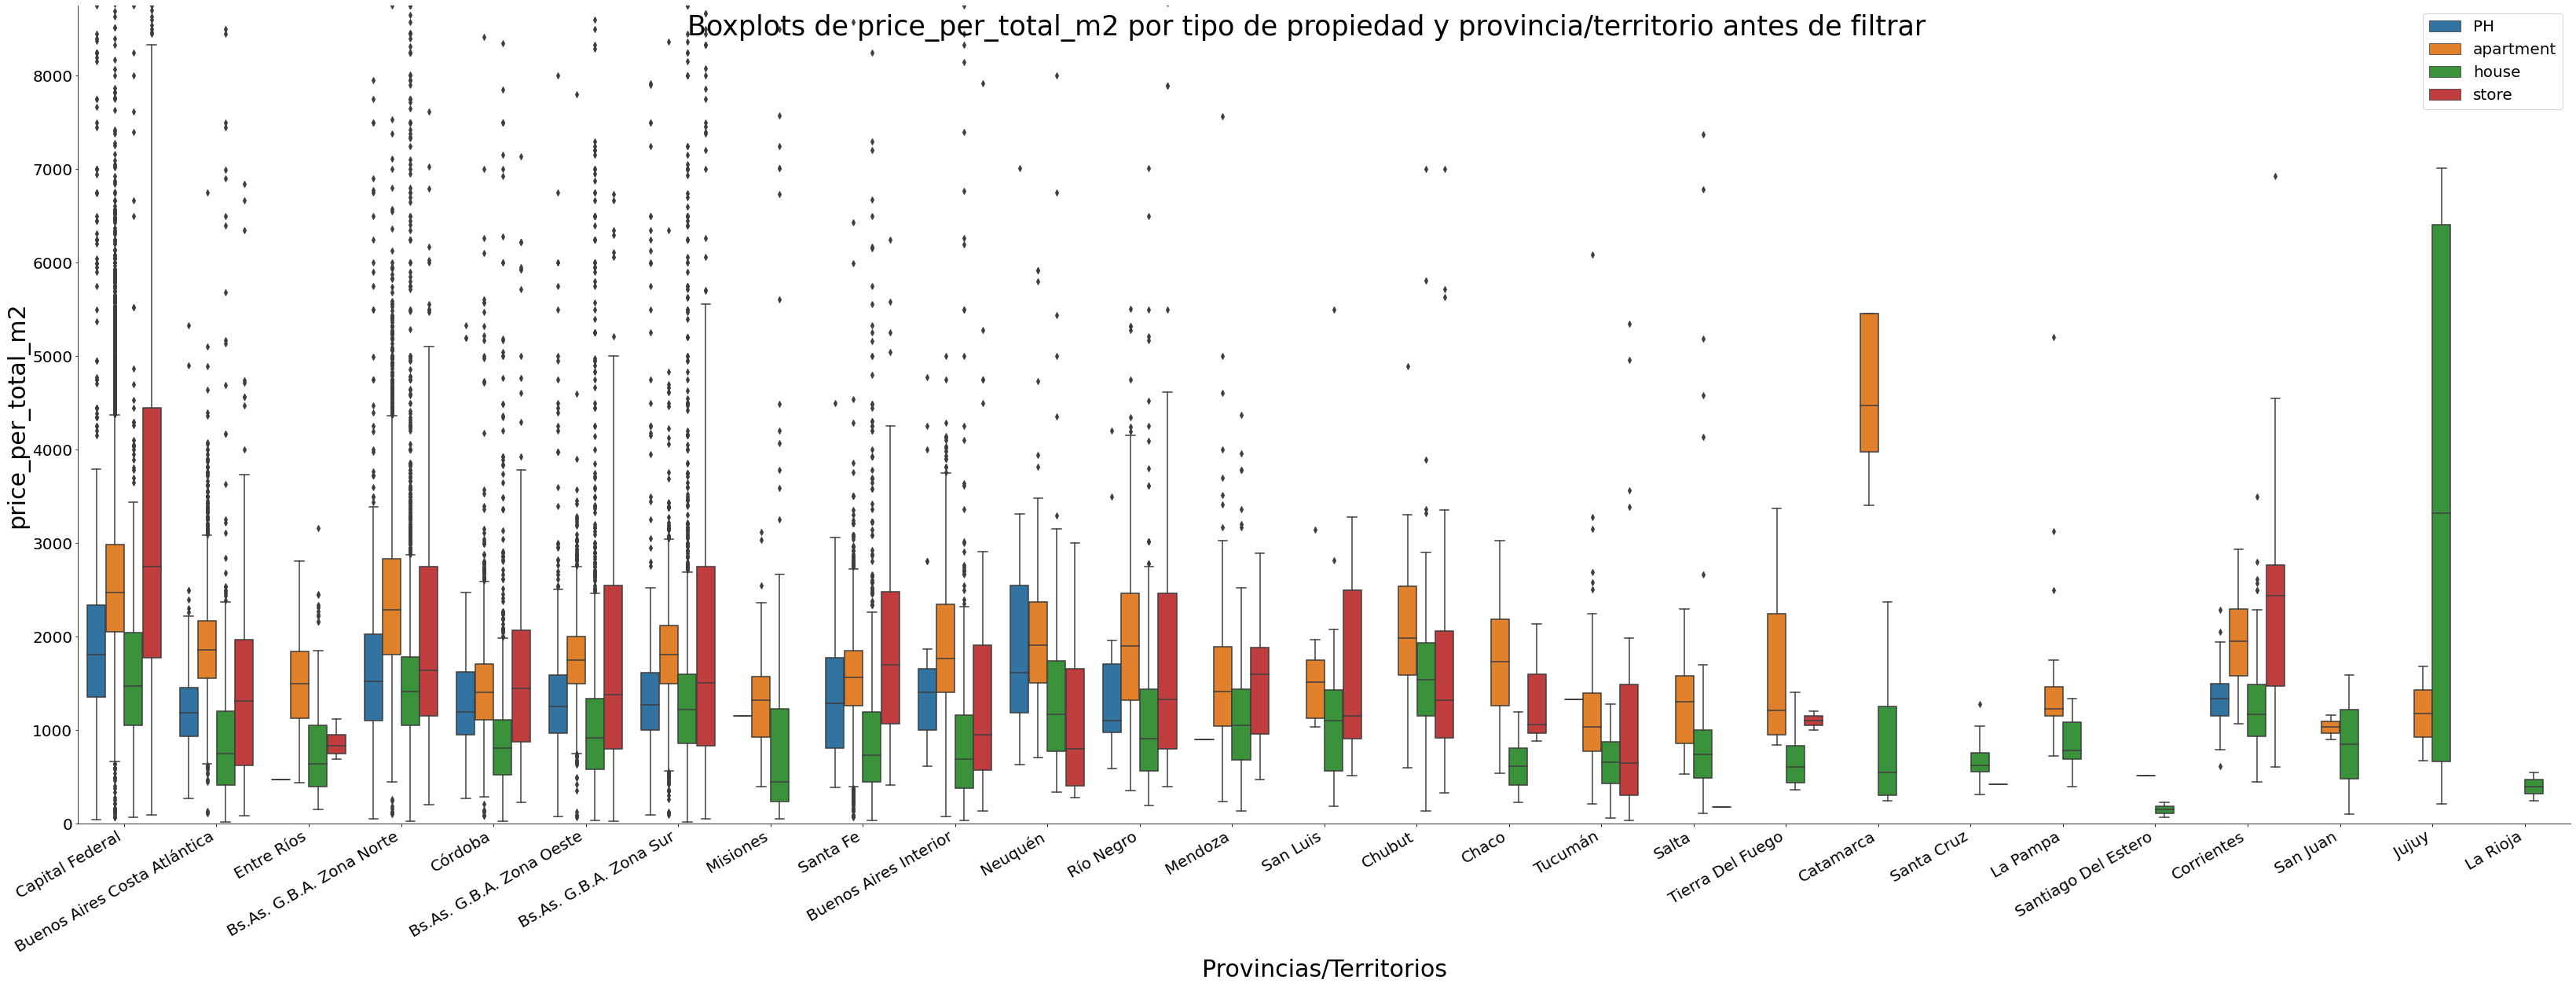

In [410]:
grupos=["property_type","parent_lvl_1"]
campos=["price_per_total_m2"]
data_trabajo=EliminarOutliers2(data=data_trabajo,campo=campos,grupos=grupos)

Se inició con 71811 filas y quedaron 70825


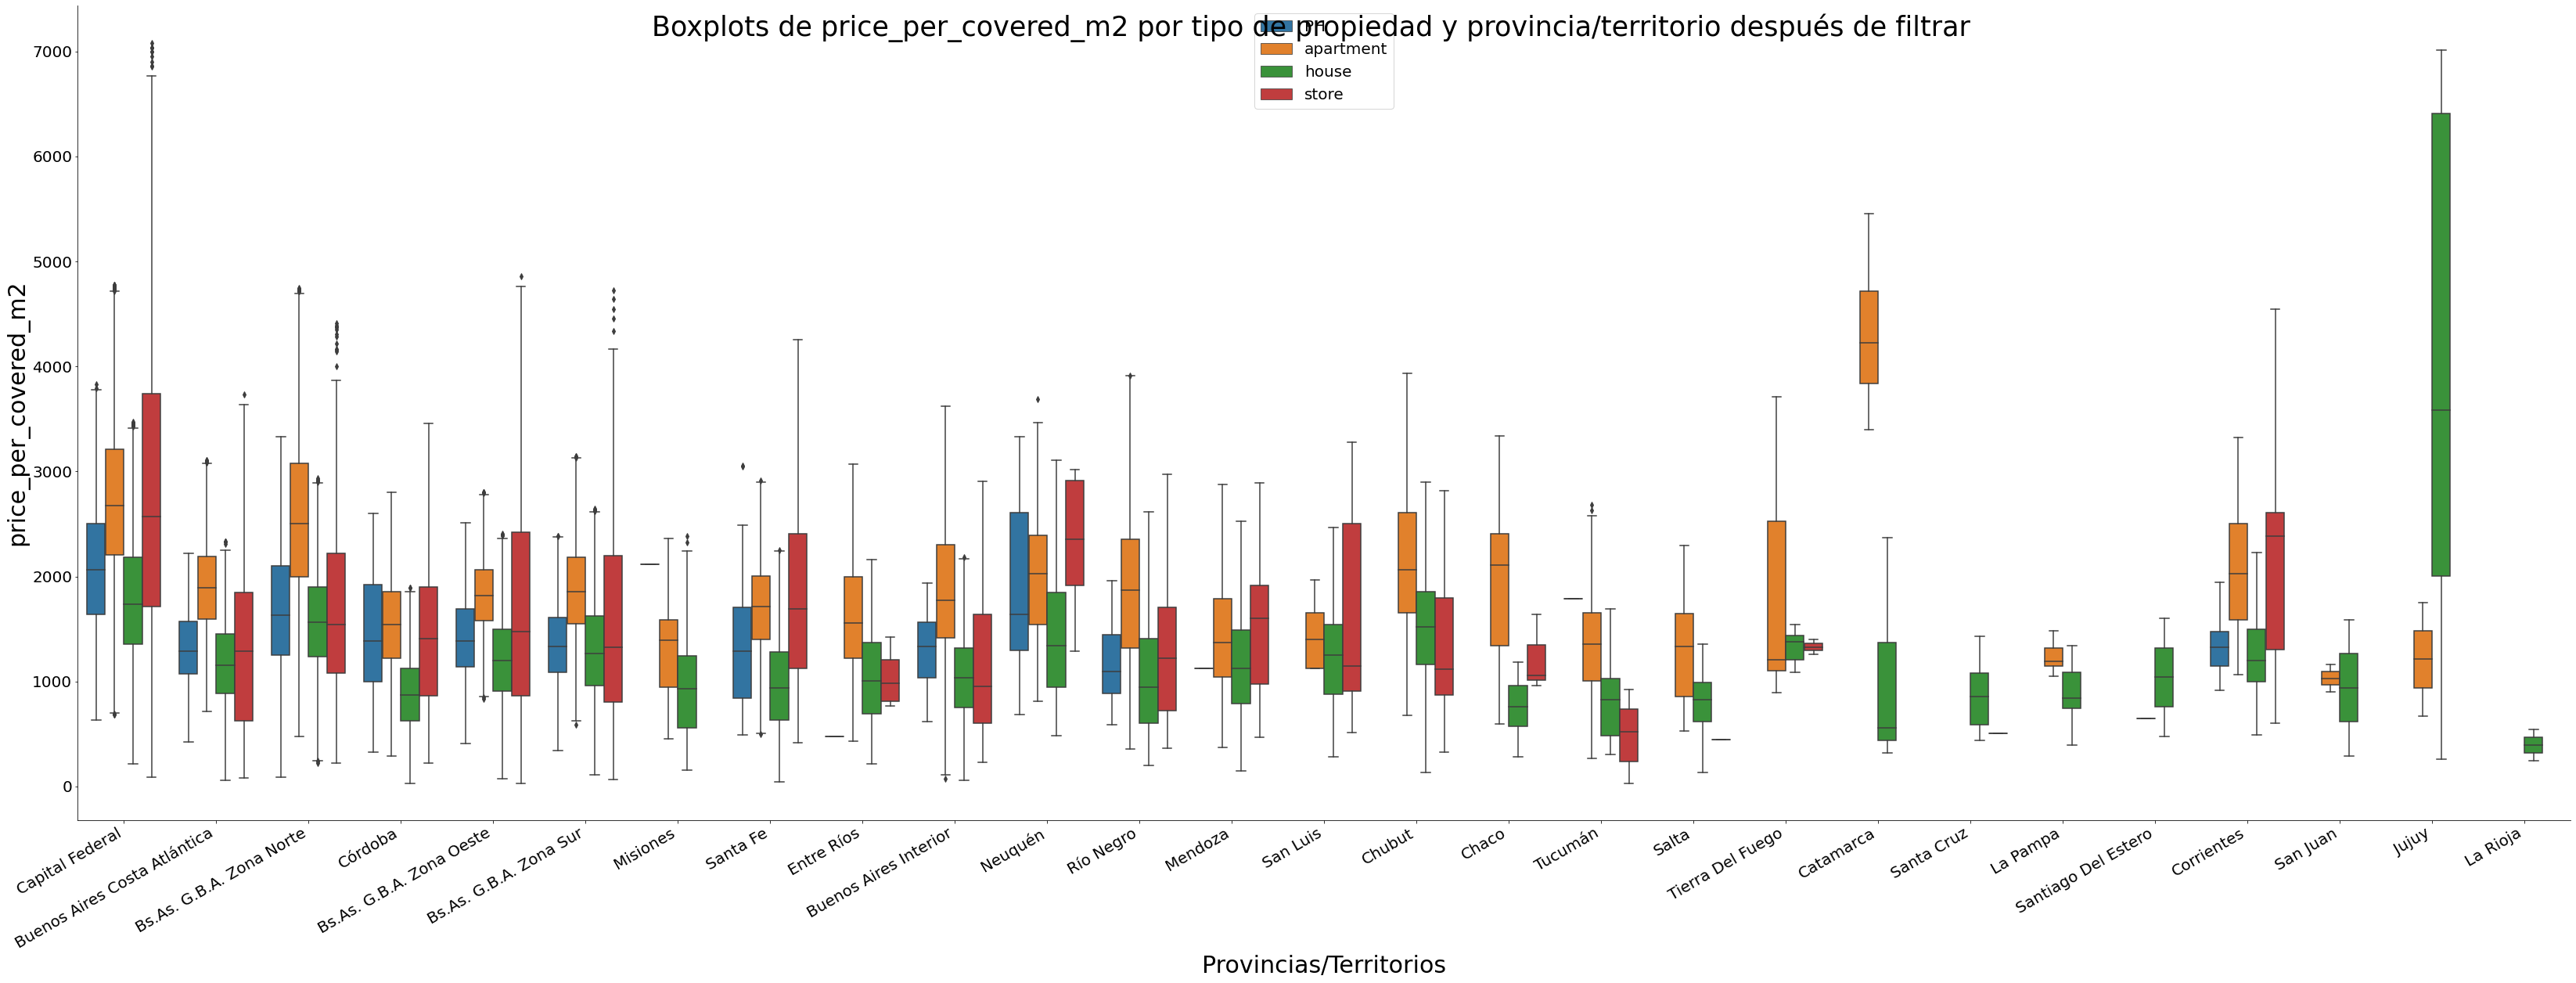

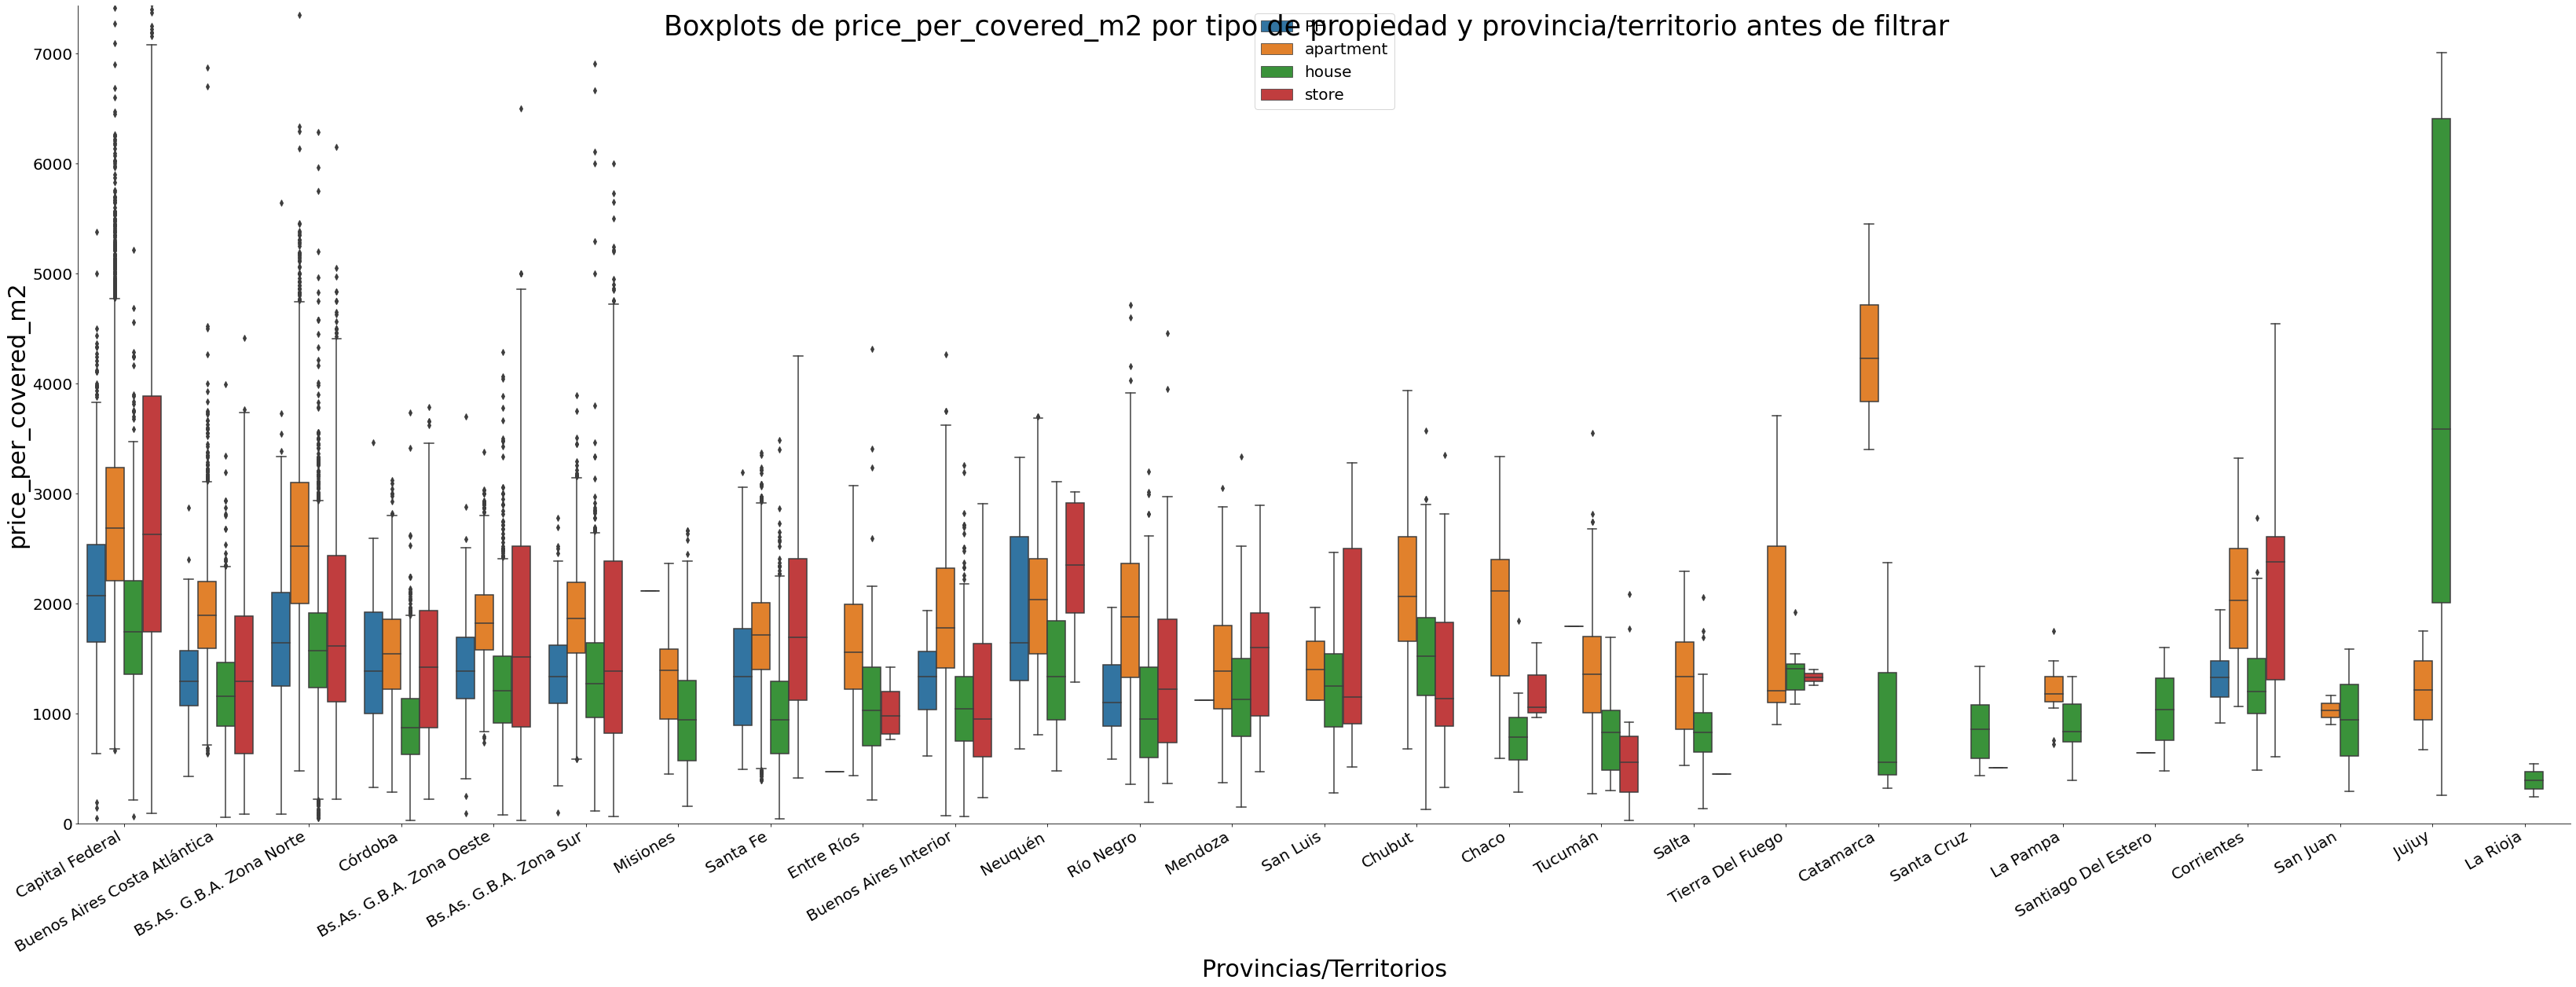

In [411]:
grupos=["property_type","parent_lvl_1"]
campos=["price_per_covered_m2"]
data_trabajo=EliminarOutliers2(data=data_trabajo,campo=campos,grupos=grupos)


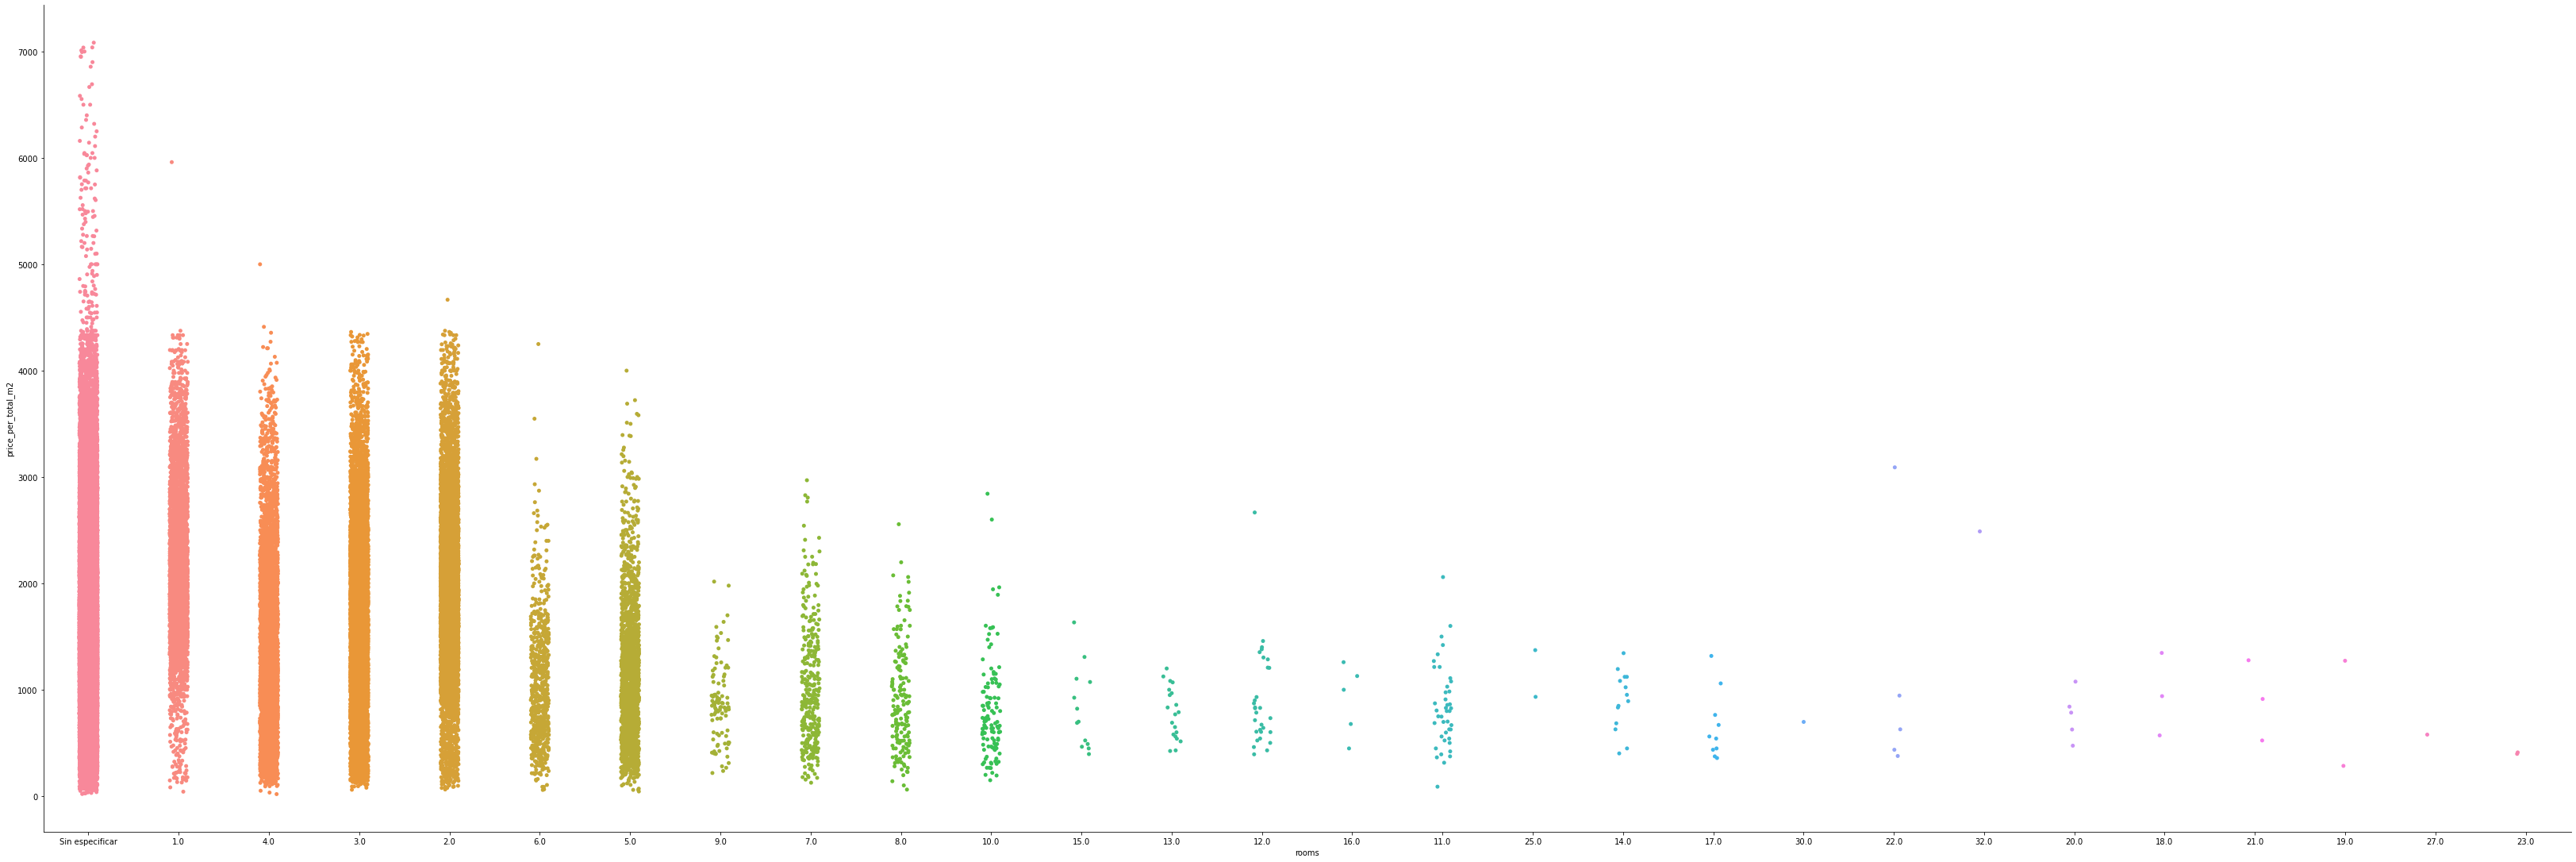

In [412]:
sns.catplot(data=data_trabajo ,x="rooms", y="price_per_total_m2", hue_order=["parent_lvl_1","property_type"], height=15, aspect=3 )

In [413]:
dataNuevoDropColum=data_trabajo.copy()

<AxesSubplot:xlabel='suma_amenities', ylabel='price_per_total_m2'>

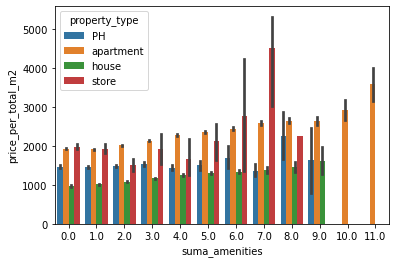

In [414]:
categorias = ["balcon","gimnasio","pileta","asador","cochera","lavanderia","lavadero", "apto_prof","baulera","calefaccion","solarium","seguridad"]
dataNuevoDropColum["suma_amenities"]=dataNuevoDropColum.loc[:,categorias].sum(1)
sns.barplot(data=dataNuevoDropColum, x="suma_amenities", y="price_per_total_m2", hue="property_type")

In [415]:
dataNuevoDropColum.isnull().sum()

property_type            0
place_name               0
price_aprox_usd          0
surface_total_in_m2      0
surface_covered_in_m2    0
rooms                    0
description              0
title                    0
parent_lvl_1             0
parent_lvl_2             0
parent_lvl_3             0
parent_lvl_4             0
description_minus        0
title_minus              0
balcon                   0
gimnasio                 0
pileta                   0
asador                   0
cochera                  0
lavanderia               0
lavadero                 0
apto_prof                0
baulera                  0
calefaccion              0
solarium                 0
seguridad                0
price_per_total_m2       0
price_per_covered_m2     0
suma_amenities           0
dtype: int64